## Final representation of iith using sqrt without normalization

7
lat len 1056
lon len 1056
mean 0.01034934618575243
avg len 1056
min(avg_std) 0.00630317380372777
max 0.018102486017119307
min 0.0
max 1.0


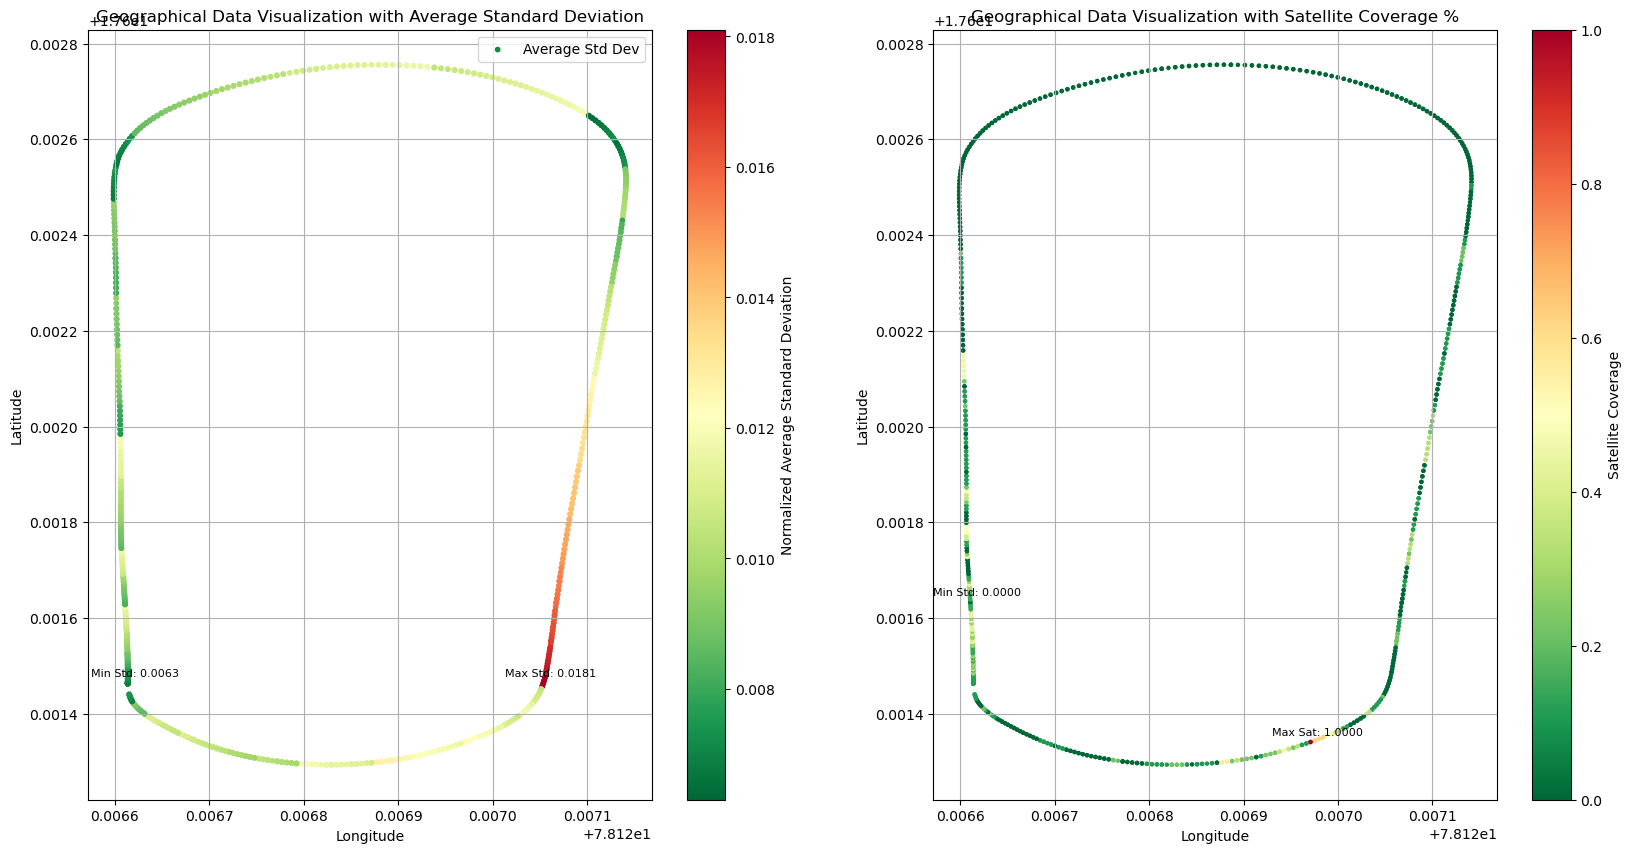

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
# Read data from the text file
data = []
with open('/Users/ravitejakunchanapalli/Downloads/sd-stdmod-dev.txt', 'r') as file:
    for line in file:
        values = line.strip().strip('[],').split(',')
        data.append([float(val) for val in values])
print(len(data[0]))
# Extract latitude, longitude, and standard deviations
latitudes = [row[0] for row in data]
longitudes = [row[1] for row in data]
std_latitudes = [row[2] for row in data]
std_longitudes = [row[3] for row in data]
percentage_changes = [(row[-1] - row[-2]) / row[-2] * 100 for row in data]
print("lat len",len(latitudes))
print("lon len",len(longitudes))

# Calculate the average of latitude and longitude standard deviations

#avg_std = [(std_lat + std_lon) / 2 for std_lat, std_lon in zip(std_latitudes, std_longitudes)]
avg_std = [math.sqrt((std_lat**2)+ (std_lon**2)) for std_lat, std_lon in zip(std_latitudes, std_longitudes)]
mean_2dstd=np.mean(avg_std)
print("mean",mean_2dstd)
print("avg len",len(avg_std))
print("min(avg_std)",min(avg_std))
print("max",max(avg_std))
# Normalize the average standard deviations for coloring
min_avg_std = min(avg_std)
max_avg_std = max(avg_std)
norm_avg_std = [(std - min_avg_std) / (max_avg_std - min_avg_std) for std in avg_std]
print("min",min(norm_avg_std))
print("max",max(norm_avg_std))
# Create scatter plot
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(longitudes, latitudes, c=avg_std, s=10, cmap='RdYlGn_r', label='Average Std Dev')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Data Visualization with Average Standard Deviation')
plt.colorbar(label='Normalized Average Standard Deviation')

# Find and annotate max and min standard deviations
max_std_index = avg_std.index(max(avg_std))
min_std_index = avg_std.index(min(avg_std))
plt.annotate(f'Max Std: {avg_std[max_std_index]:.4f}', (longitudes[max_std_index], latitudes[max_std_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
plt.annotate(f'Min Std: {avg_std[min_std_index]:.4f}', (longitudes[min_std_index], latitudes[min_std_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

plt.legend()
plt.grid()

percentage_changes = [(row[-1] - row[-2]) / row[-2] * 100 for row in data]

# Normalize the percentage changes for coloring
min_pc = min(percentage_changes)
max_pc = max(percentage_changes)
norm_pc = [(pc - min_pc) / (max_pc - min_pc) for pc in percentage_changes]

plt.subplot(122)
plt.scatter(longitudes, latitudes, c=norm_pc, s=5, cmap='RdYlGn_r', label='% Change')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Data Visualization with Satellite Coverage %')
plt.colorbar(label='Satellite Coverage')

max_sat_index = norm_pc.index(max(norm_pc))
min_sat_index = norm_pc.index(min(norm_pc))
plt.annotate(f'Max Sat: {norm_pc[max_sat_index]:.4f}', (longitudes[max_sat_index], latitudes[max_sat_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
plt.annotate(f'Min Std: {norm_pc[min_sat_index]:.4f}', (longitudes[min_sat_index], latitudes[min_sat_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)



# plt.legend()
plt.grid()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
[]


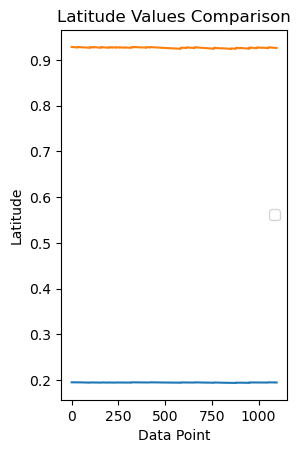

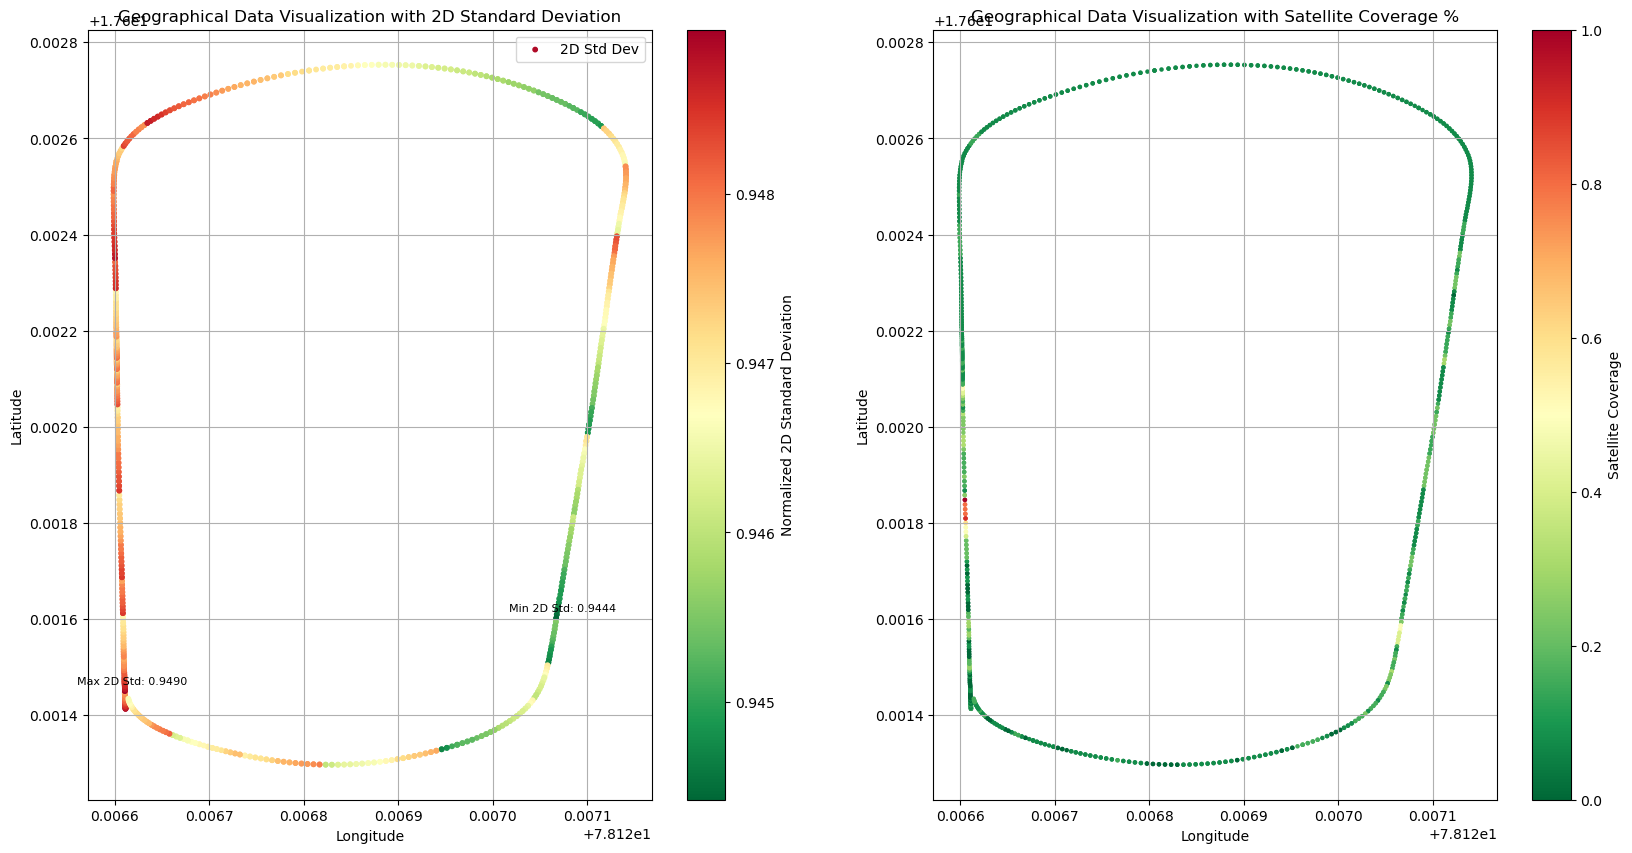

In [33]:
import numpy as np
import matplotlib.pyplot as plt
# Function to calculate 2D standard deviation
sdx=[]
sdy=[]
def calculate_2d_sd(latitudes, longitudes, std_latitudes, std_longitudes):
    global sdx
    global sdy
    sd_2d_list = []
    for lat, lon, std_lat, std_lon in zip(latitudes, longitudes, std_latitudes, std_longitudes):
        # Convert latitude and longitude to Cartesian coordinates
        x = np.cos(lat) * np.cos(lon)
        y = np.cos(lat) * np.sin(lon)

        # Weight each coordinate by its corresponding standard deviation value
        weighted_x = x * std_lon
        weighted_y = y * std_lat

        # Calculate weighted mean
        weighted_mean_x = np.sum(weighted_x) / np.sum(std_lon)
        weighted_mean_y = np.sum(weighted_y) / np.sum(std_lat)

        # Calculate standard deviation of distances from the weighted mean for x and y separately
        sd_x = np.sqrt(np.sum((weighted_x - weighted_mean_x)**2 * std_lon) / np.sum(std_lon))
        sd_y = np.sqrt(np.sum((weighted_y - weighted_mean_y)**2 * std_lat) / np.sum(std_lat))
        # Combine the standard deviations
        sd_2d = np.sqrt(sd_x**2 + sd_y**2)
        sd_2d_list.append(sd_2d)
    return sd_2d_list
print(sdx)
print(sdy)
# Read data from the text file
data = []
with open('/Users/ravitejakunchanapalli/Downloads/sd-stddev (1).txt', 'r') as file:
    for line in file:
        values = line.strip().strip('[],').split(',')
        data.append([float(val) for val in values])


# print("mini-sdx",min(sdx))
# print("mini-sdy",max(sdx))


# Extract latitude, longitude, and standard deviations
latitudes = [row[0] for row in data]
longitudes = [row[1] for row in data]
std_latitudes = [row[2] for row in data]
std_longitudes = [row[3] for row in data]
percentage_changes = [(row[-1] - row[-2]) / row[-2] * 100 for row in data]

# Calculate 2D standard deviation
sd_2d_list = calculate_2d_sd(np.radians(latitudes), np.radians(longitudes), std_latitudes, std_longitudes)



plt.subplot(1, 2, 1)  # (rows, columns, plot_number)
plt.plot(sdx)
plt.plot(sdy)
plt.xlabel('Data Point')
plt.ylabel('Latitude')
plt.title('Latitude Values Comparison')
plt.legend()


# plt.subplot(1, 2, 2)  # (rows, columns, plot_number)
# plt.plot(sdy, label='sdy')
# plt.xlabel('Data Point')
# plt.ylabel('Latitude')
# plt.title('Latitude Values Comparison')
# plt.legend()




# print("min",min(sd_2d_list),"max",max(sd_2d_list))
# Normalize the 2D standard deviation for coloring
norm_sd_2d = [(sd - np.min(sd_2d_list)) / (np.max(sd_2d_list) - np.min(sd_2d_list)) for sd in sd_2d_list]
# Create scatter plot
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(longitudes, latitudes, c=sd_2d_list, s=10, cmap='RdYlGn_r', label='2D Std Dev')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Data Visualization with 2D Standard Deviation')
plt.colorbar(label='Normalized 2D Standard Deviation')

# Find and annotate max and min standard deviations
max_sd_index = np.argmax(sd_2d_list)
min_sd_index = np.argmin(sd_2d_list)
plt.annotate(f'Max 2D Std: {sd_2d_list[max_sd_index]:.4f}', (longitudes[max_sd_index], latitudes[max_sd_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
plt.annotate(f'Min 2D Std: {sd_2d_list[min_sd_index]:.4f}', (longitudes[min_sd_index], latitudes[min_sd_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

plt.legend()
plt.grid()

percentage_changes = [(row[-1] - row[-2]) / row[-2] * 100 for row in data]

# Normalize the percentage changes for coloring
min_pc = min(percentage_changes)
max_pc = max(percentage_changes)
norm_pc = [(pc - min_pc) / (max_pc - min_pc) for pc in percentage_changes]

plt.subplot(122)
plt.scatter(longitudes, latitudes, c=norm_pc, s=5, cmap='RdYlGn_r', label='% Change')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Data Visualization with Satellite Coverage %')
plt.colorbar(label='Satellite Coverage')
# plt.legend()
plt.grid()
plt.show()


In [ ]:
# Normalize the average standard deviations for coloring
min_avg_std = min(avg_std)
max_avg_std = max(avg_std)
norm_avg_std = [(std - min_avg_std) / (max_avg_std - min_avg_std) for std in avg_std]

lat len 2060
lon len 2060
avg_ len 2060
min(avg_std) 0.00565
max 0.89025
norm_avg_std [0.002713090662446304, 0.0014130680533574501, 0.0035609314944607747, 0.0015261134976260454, 0.0, 0.003617454216595072, 0.00022609088853719158, 0.000791318109880172, 0.003617454216595072, 0.004013113271535158, 0.0022609088853719197, 0.0015261134976260464, 0.002882658828849197, 0.006330544879041375, 0.0033913633280578813, 0.002034817996834728, 0.002713090662446304, 0.0037304996608636676, 0.003787022382997965, 0.003278317883789284, 0.00650011304544427, 0.007008817544652951, 0.004126158715803753, 0.004013113271535158, 0.0024304770517748135, 0.0065566357675785674, 0.0037304996608636676, 0.0018652498304318342, 0.002430477051774815, 0.002882658828849197, 0.00593488582410129, 0.003165272439520687, 0.005200090436355416, 0.002826136106714901, 0.00039565905494008647, 0.004860954103549628, 0.000791318109880172, 0.0012434998869545561, 0.004126158715803753, 0.00452181777074384, 0.0024869997739091114, 0.001356545331

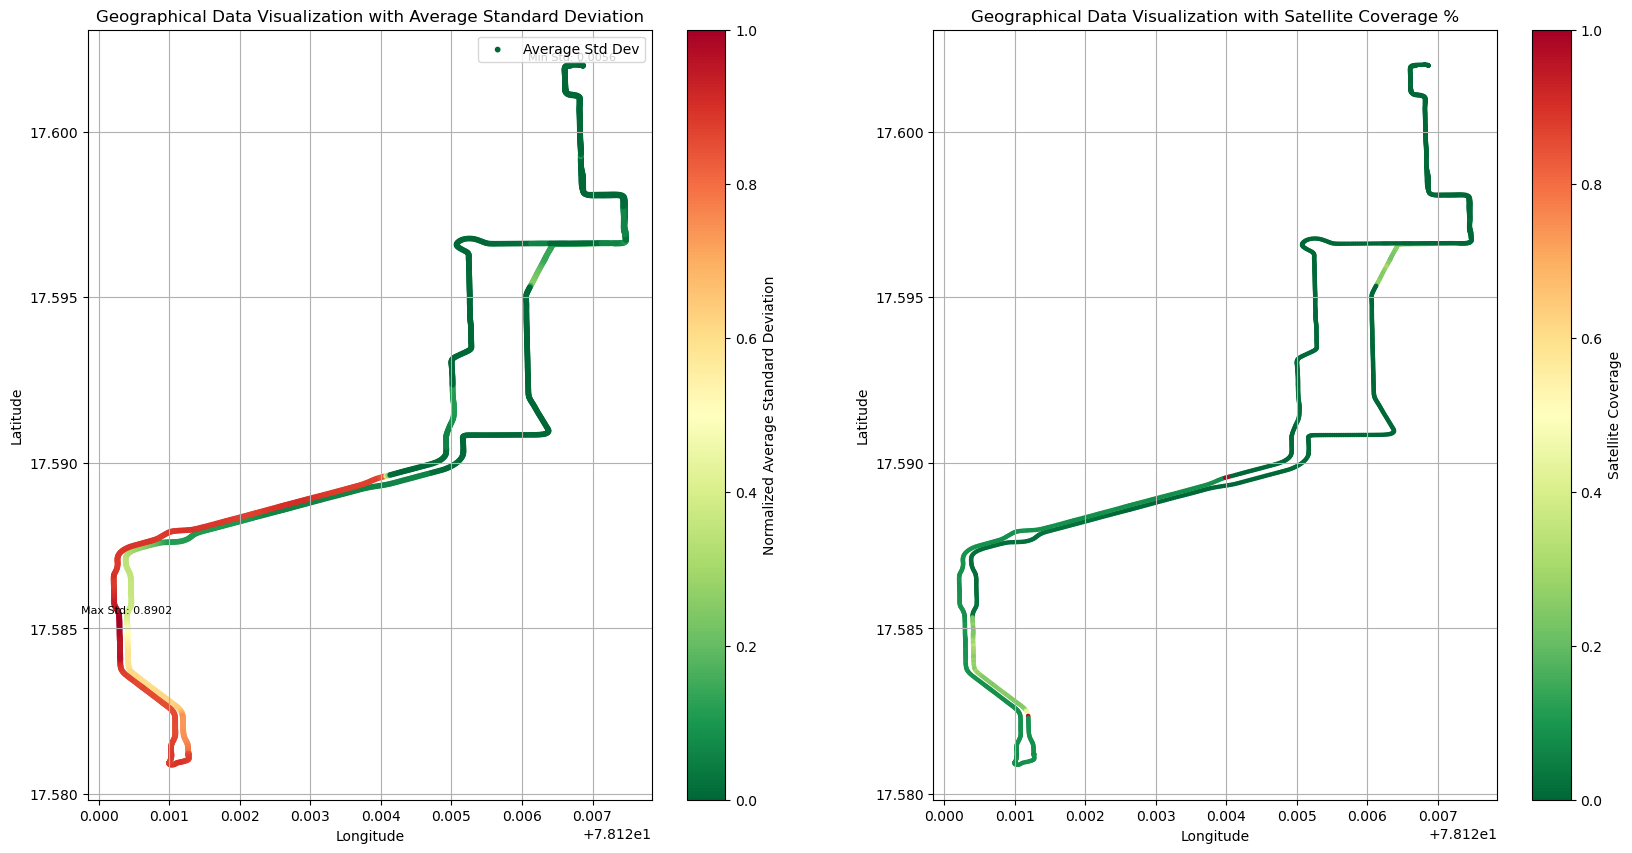

In [19]:
import matplotlib.pyplot as plt

# Read data from the text file
data = []
with open('/Users/ravitejakunchanapalli/Downloads/sd-testbedtomaingate_and_back.txt', 'r') as file:
    for line in file:
        values = line.strip().strip('[],').split(',')
        data.append([float(val) for val in values])

# Extract latitude, longitude, and standard deviations
latitudes = [row[0] for row in data]
longitudes = [row[1] for row in data]
std_latitudes = [row[2] for row in data]
std_longitudes = [row[3] for row in data]
percentage_changes = [(row[-1] - row[-2]) / row[-2] * 100 for row in data]
print("lat len",len(latitudes))
print("lon len",len(longitudes))
# Calculate the average of latitude and longitude standard deviations

avg_std = [(std_lat + std_lon) / 2 for std_lat, std_lon in zip(std_latitudes, std_longitudes)]
print("avg_ len",len(avg_std))

print("min(avg_std)",min(avg_std))
print("max",max(avg_std))
# Normalize the average standard deviations for coloring
min_avg_std = min(avg_std)
max_avg_std = max(avg_std)
norm_avg_std = [(std - min_avg_std) / (max_avg_std - min_avg_std) for std in avg_std]
print("norm_avg_std",norm_avg_std)
print("min",min(norm_avg_std),"max",max(avg_std))
# Create scatter plot
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(longitudes, latitudes, c=norm_avg_std, s=10, cmap='RdYlGn_r', label='Average Std Dev')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Data Visualization with Average Standard Deviation')
plt.colorbar(label='Normalized Average Standard Deviation')

# Find and annotate max and min standard deviations
max_std_index = avg_std.index(max(avg_std))
min_std_index = avg_std.index(min(avg_std))
plt.annotate(f'Max Std: {avg_std[max_std_index]:.4f}', (longitudes[max_std_index], latitudes[max_std_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
plt.annotate(f'Min Std: {avg_std[min_std_index]:.4f}', (longitudes[min_std_index], latitudes[min_std_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

plt.legend()
plt.grid()

percentage_changes = [(row[-1] - row[-2]) / row[-2] * 100 for row in data]

# Normalize the percentage changes for coloring
min_pc = min(percentage_changes)
max_pc = max(percentage_changes)
norm_pc = [(pc - min_pc) / (max_pc - min_pc) for pc in percentage_changes]

plt.subplot(122)
plt.scatter(longitudes, latitudes, c=norm_pc, s=5, cmap='RdYlGn_r', label='% Change')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Data Visualization with Satellite Coverage %')
plt.colorbar(label='Satellite Coverage')
# plt.legend()
plt.grid()
plt.show()


7
lat len 1097
lon len 1097
avg len 1097
min(avg_std) 0.0046
max 0.0102
min 0.0
max 1.0


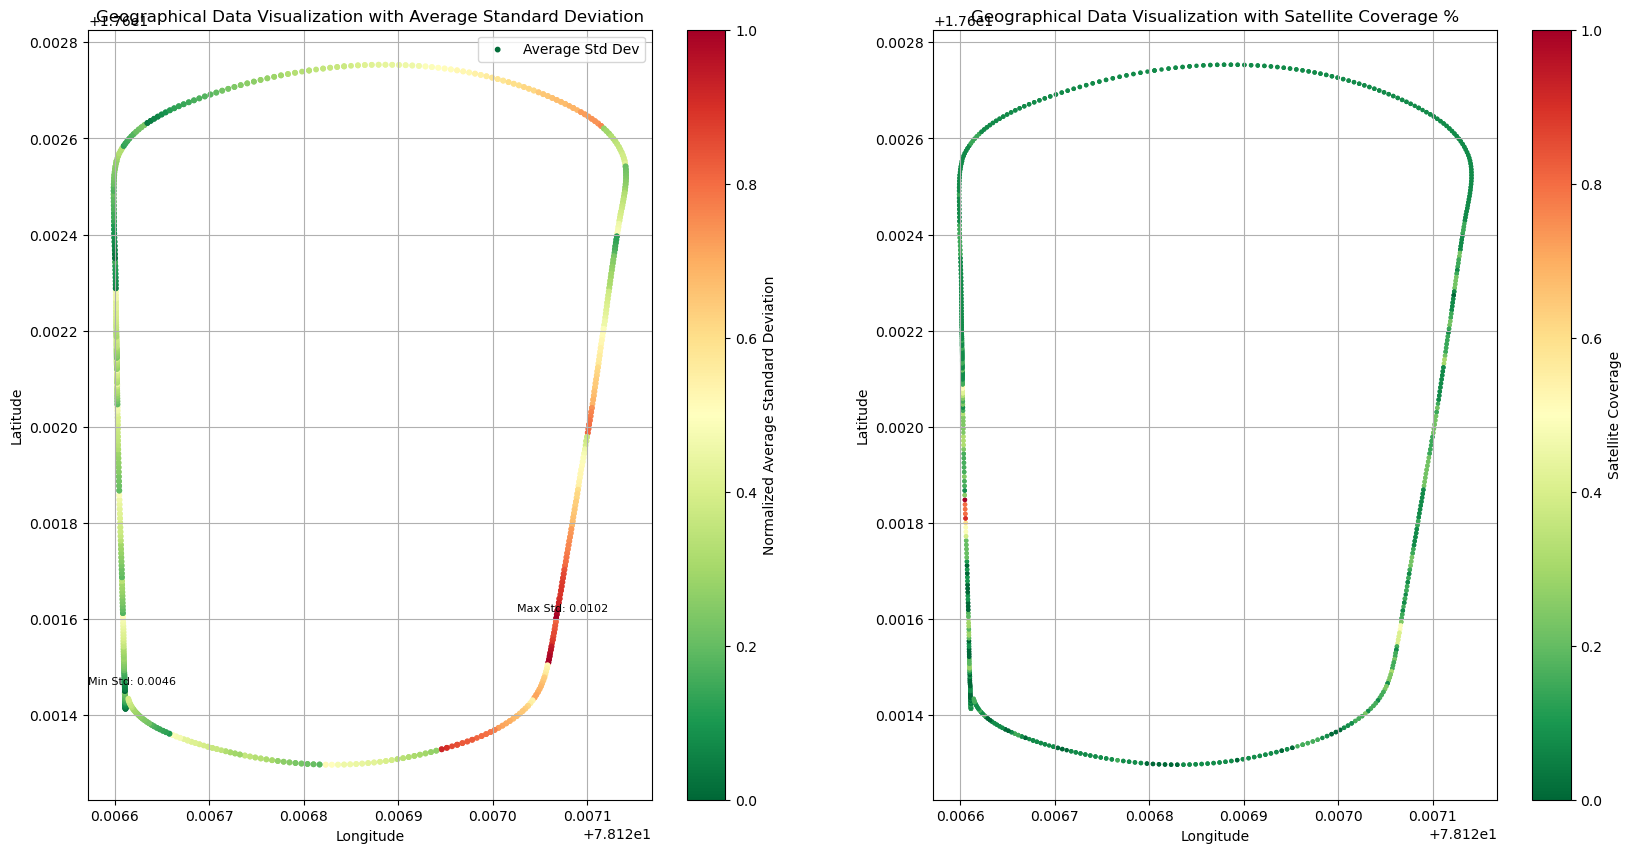

In [24]:
import matplotlib.pyplot as plt

# Read data from the text file
data = []
with open('/Users/ravitejakunchanapalli/Desktop/testbed.txt', 'r') as file:
    for line in file:
        values = line.strip().strip('[],').split(',')
        data.append([float(val) for val in values])
print(len(data[0]))
# Extract latitude, longitude, and standard deviations
latitudes = [row[0] for row in data]
longitudes = [row[1] for row in data]
std_latitudes = [row[2] for row in data]
std_longitudes = [row[3] for row in data]
percentage_changes = [(row[-1] - row[-2]) / row[-2] * 100 for row in data]
print("lat len",len(latitudes))
print("lon len",len(longitudes))

# Calculate the average of latitude and longitude standard deviations

avg_std = [(std_lat + std_lon) / 2 for std_lat, std_lon in zip(std_latitudes, std_longitudes)]
print("avg len",len(avg_std))

print("min(avg_std)",min(avg_std))
print("max",max(avg_std))
# Normalize the average standard deviations for coloring
min_avg_std = min(avg_std)
max_avg_std = max(avg_std)
norm_avg_std = [(std - min_avg_std) / (max_avg_std - min_avg_std) for std in avg_std]
print("min",min(norm_avg_std))
print("max",max(norm_avg_std))
# Create scatter plot
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(longitudes, latitudes, c=norm_avg_std, s=10, cmap='RdYlGn_r', label='Average Std Dev')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Data Visualization with Average Standard Deviation')
plt.colorbar(label='Normalized Average Standard Deviation')

# Find and annotate max and min standard deviations
max_std_index = avg_std.index(max(avg_std))
min_std_index = avg_std.index(min(avg_std))
plt.annotate(f'Max Std: {avg_std[max_std_index]:.4f}', (longitudes[max_std_index], latitudes[max_std_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
plt.annotate(f'Min Std: {avg_std[min_std_index]:.4f}', (longitudes[min_std_index], latitudes[min_std_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

plt.legend()
plt.grid()

percentage_changes = [(row[-1] - row[-2]) / row[-2] * 100 for row in data]

# Normalize the percentage changes for coloring
min_pc = min(percentage_changes)
max_pc = max(percentage_changes)
norm_pc = [(pc - min_pc) / (max_pc - min_pc) for pc in percentage_changes]

plt.subplot(122)
plt.scatter(longitudes, latitudes, c=norm_pc, s=5, cmap='RdYlGn_r', label='% Change')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Data Visualization with Satellite Coverage %')
plt.colorbar(label='Satellite Coverage')
# plt.legend()
plt.grid()
plt.show()


7
lat len 1097
lon len 1097
avg len 1097
min(avg_std) 0.0046
max 0.0102
min 0.0
max 1.0


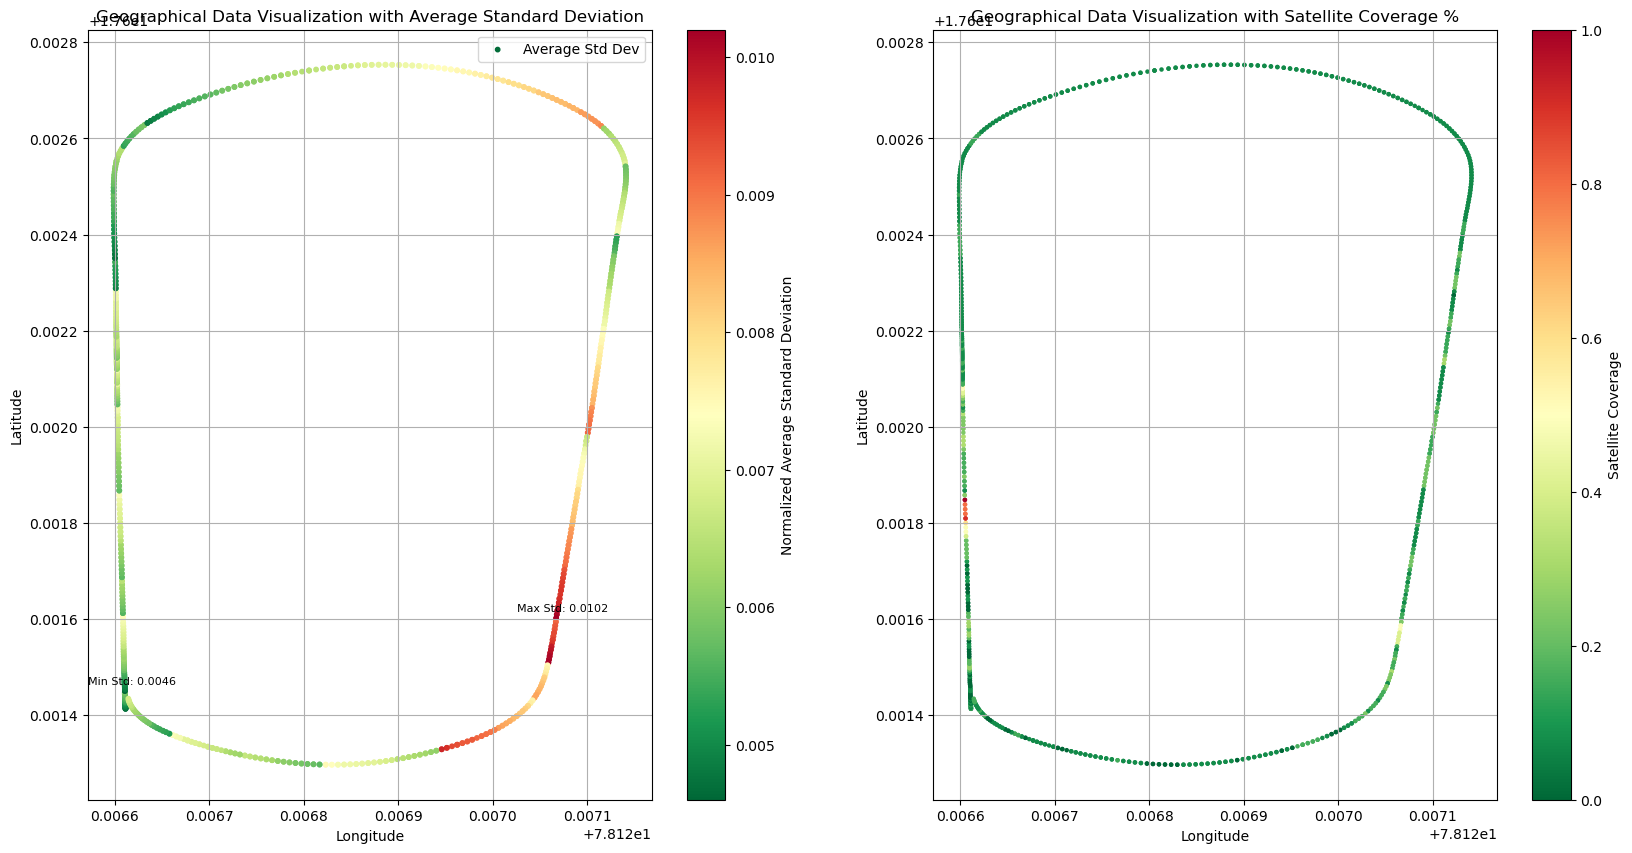

In [25]:
import matplotlib.pyplot as plt

# Read data from the text file
data = []
with open('/Users/ravitejakunchanapalli/Desktop/testbed.txt', 'r') as file:
    for line in file:
        values = line.strip().strip('[],').split(',')
        data.append([float(val) for val in values])
print(len(data[0]))
# Extract latitude, longitude, and standard deviations
latitudes = [row[0] for row in data]
longitudes = [row[1] for row in data]
std_latitudes = [row[2] for row in data]
std_longitudes = [row[3] for row in data]
percentage_changes = [(row[-1] - row[-2]) / row[-2] * 100 for row in data]
print("lat len",len(latitudes))
print("lon len",len(longitudes))

# Calculate the average of latitude and longitude standard deviations

avg_std = [(std_lat + std_lon) / 2 for std_lat, std_lon in zip(std_latitudes, std_longitudes)]
print("avg len",len(avg_std))

print("min(avg_std)",min(avg_std))
print("max",max(avg_std))
# Normalize the average standard deviations for coloring
min_avg_std = min(avg_std)
max_avg_std = max(avg_std)
norm_avg_std = [(std - min_avg_std) / (max_avg_std - min_avg_std) for std in avg_std]
print("min",min(norm_avg_std))
print("max",max(norm_avg_std))
# Create scatter plot
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(longitudes, latitudes, c=avg_std, s=10, cmap='RdYlGn_r', label='Average Std Dev')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Data Visualization with Average Standard Deviation')
plt.colorbar(label='Normalized Average Standard Deviation')

# Find and annotate max and min standard deviations
max_std_index = avg_std.index(max(avg_std))
min_std_index = avg_std.index(min(avg_std))
plt.annotate(f'Max Std: {avg_std[max_std_index]:.4f}', (longitudes[max_std_index], latitudes[max_std_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
plt.annotate(f'Min Std: {avg_std[min_std_index]:.4f}', (longitudes[min_std_index], latitudes[min_std_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

plt.legend()
plt.grid()

percentage_changes = [(row[-1] - row[-2]) / row[-2] * 100 for row in data]

# Normalize the percentage changes for coloring
min_pc = min(percentage_changes)
max_pc = max(percentage_changes)
norm_pc = [(pc - min_pc) / (max_pc - min_pc) for pc in percentage_changes]

plt.subplot(122)
plt.scatter(longitudes, latitudes, c=norm_pc, s=5, cmap='RdYlGn_r', label='% Change')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Data Visualization with Satellite Coverage %')
plt.colorbar(label='Satellite Coverage')
# plt.legend()
plt.grid()
plt.show()


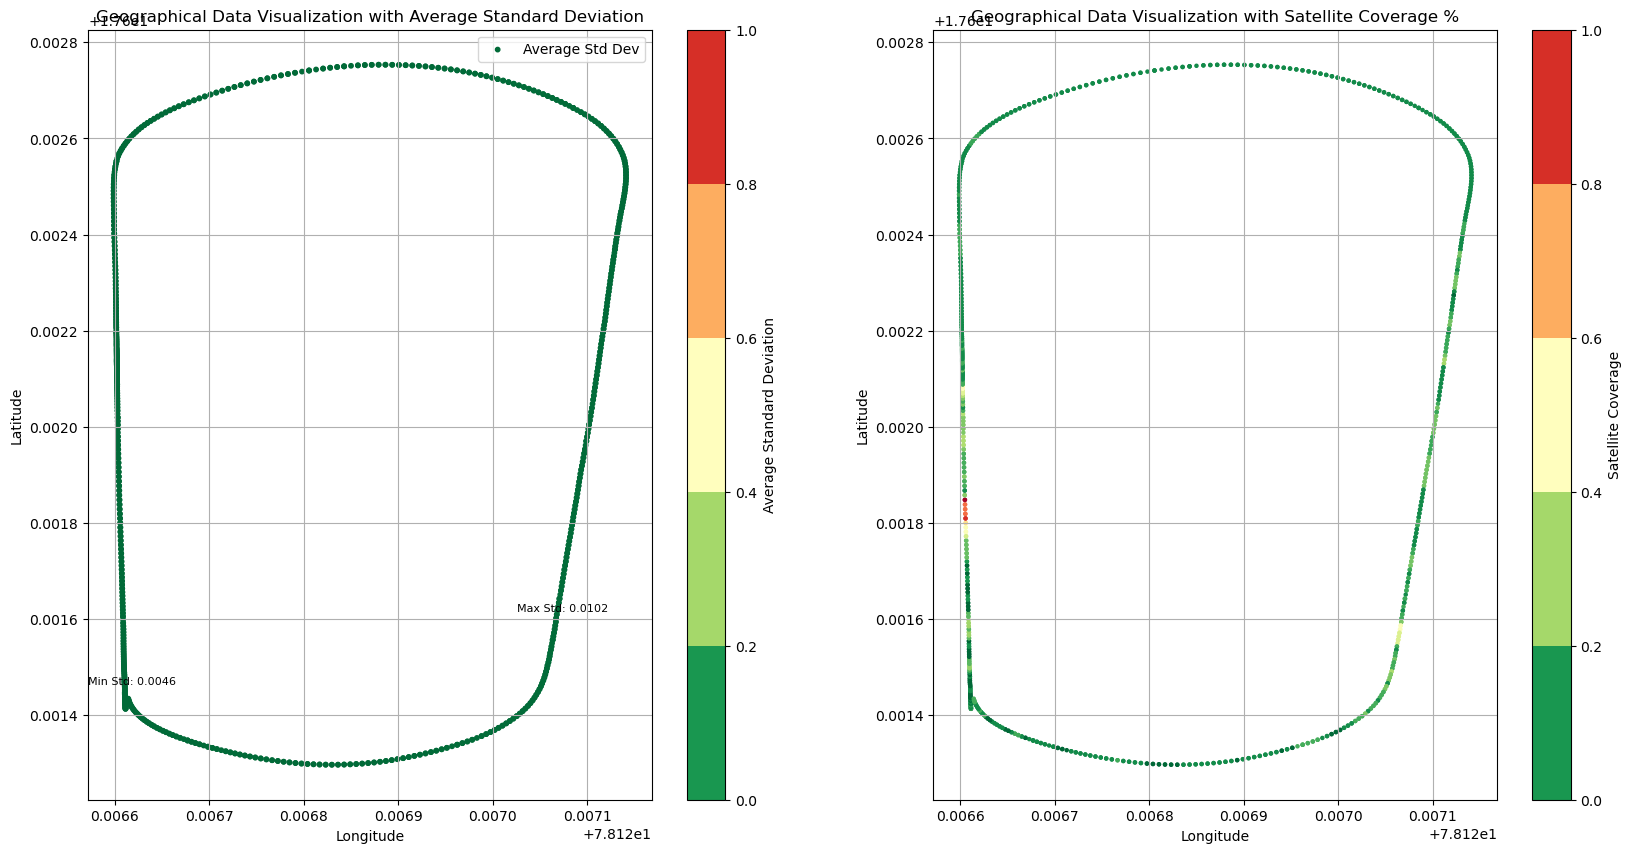

In [5]:
import matplotlib.pyplot as plt

# Read data from the text file
data = []
with open('/Users/ravitejakunchanapalli/Desktop/testbed.txt', 'r') as file:
    for line in file:
        values = line.strip().strip('[],').split(',')
        data.append([float(val) for val in values])

# Extract latitude, longitude, and standard deviations
latitudes = [row[0] for row in data]
longitudes = [row[1] for row in data]
std_latitudes = [row[2] for row in data]
std_longitudes = [row[3] for row in data]
percentage_changes = [(row[-1] - row[-2]) / row[-2] * 100 for row in data]


# Calculate the average of latitude and longitude standard deviations
avg_std = [(std_lat + std_lon) / 2 for std_lat, std_lon in zip(std_latitudes, std_longitudes)]

# Define custom color boundaries
custom_boundaries = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

# Create scatter plot for Average Std Dev
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(longitudes, latitudes, c=avg_std, s=10, cmap='RdYlGn_r', label='Average Std Dev', vmin=0, vmax=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Data Visualization with Average Standard Deviation')
plt.colorbar(label='Average Standard Deviation', boundaries=custom_boundaries)
plt.legend()
plt.grid()

# Find and annotate max and min standard deviations
max_std_index = avg_std.index(max(avg_std))
min_std_index = avg_std.index(min(avg_std))
plt.annotate(f'Max Std: {avg_std[max_std_index]:.4f}', (longitudes[max_std_index], latitudes[max_std_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
plt.annotate(f'Min Std: {avg_std[min_std_index]:.4f}', (longitudes[min_std_index], latitudes[min_std_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

# Normalize the percentage changes for coloring
min_pc = min(percentage_changes)
max_pc = max(percentage_changes)
norm_pc = [(pc - min_pc) / (max_pc - min_pc) for pc in percentage_changes]

# Create scatter plot for Satellite Coverage %
plt.subplot(122)
plt.scatter(longitudes, latitudes, c=norm_pc, s=5, cmap='RdYlGn_r', label='% Change', vmin=0, vmax=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Data Visualization with Satellite Coverage %')
plt.colorbar(label='Satellite Coverage', boundaries=custom_boundaries)
plt.grid()

plt.show()


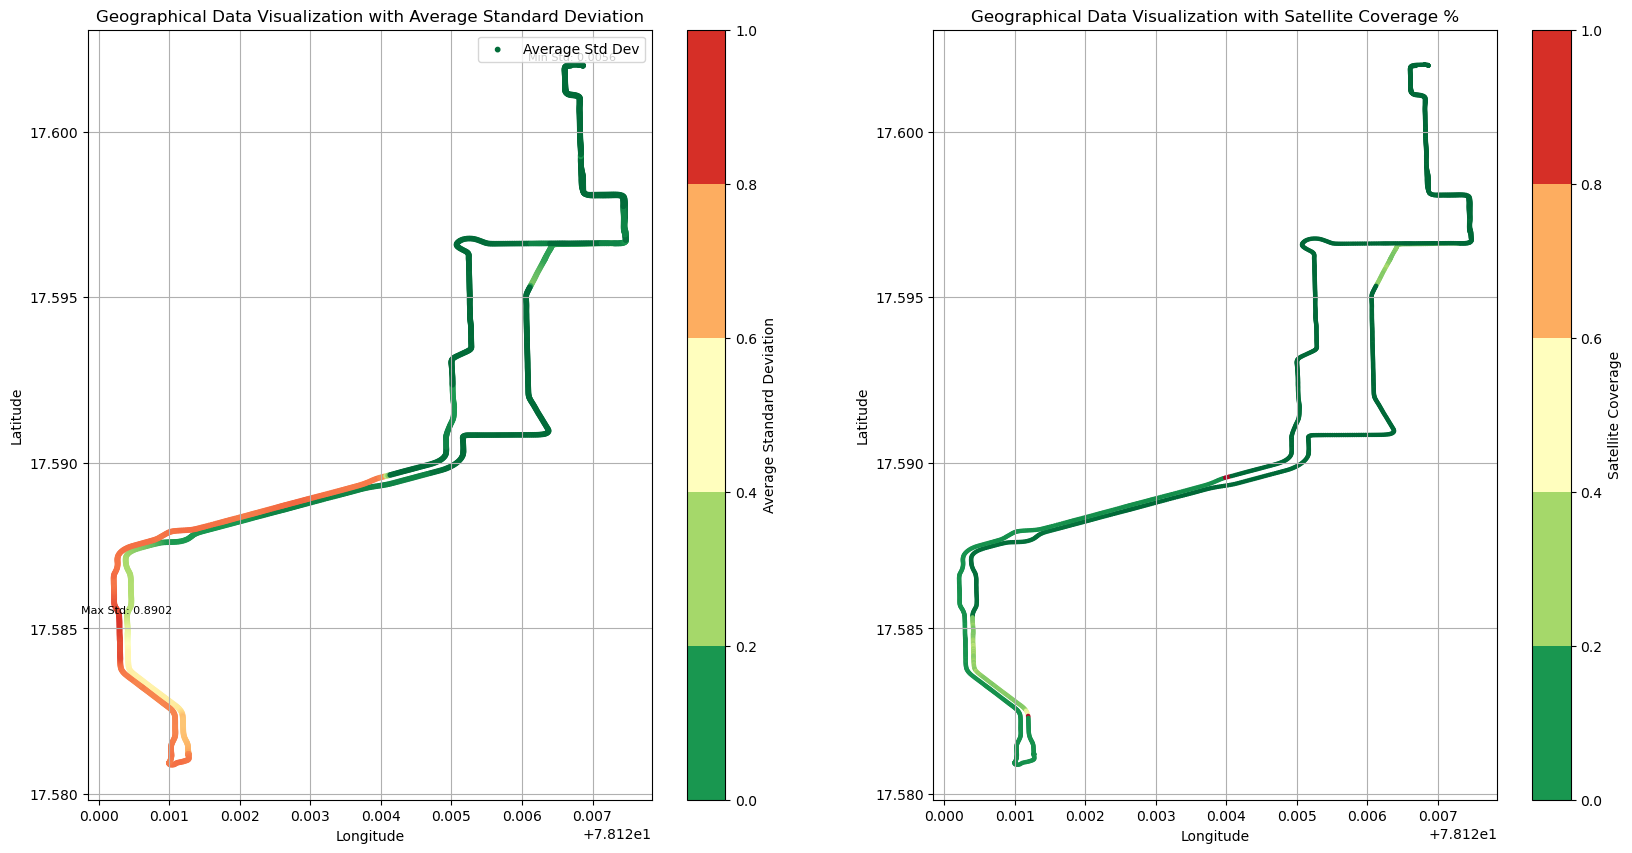

In [6]:
import matplotlib.pyplot as plt

# Read data from the text file
data = []
with open('/Users/ravitejakunchanapalli/Downloads/sd-testbedtomaingate_and_back.txt', 'r') as file:
    for line in file:
        values = line.strip().strip('[],').split(',')
        data.append([float(val) for val in values])

# Extract latitude, longitude, and standard deviations
latitudes = [row[0] for row in data]
longitudes = [row[1] for row in data]
std_latitudes = [row[2] for row in data]
std_longitudes = [row[3] for row in data]
percentage_changes = [(row[-1] - row[-2]) / row[-2] * 100 for row in data]

# Calculate the average of latitude and longitude standard deviations
avg_std = [(std_lat + std_lon) / 2 for std_lat, std_lon in zip(std_latitudes, std_longitudes)]

# Define custom color boundaries
custom_boundaries = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

# Create scatter plot for Average Std Dev
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(longitudes, latitudes, c=avg_std, s=10, cmap='RdYlGn_r', label='Average Std Dev', vmin=0, vmax=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Data Visualization with Average Standard Deviation')
plt.colorbar(label='Average Standard Deviation', boundaries=custom_boundaries)
plt.legend()
plt.grid()

# Find and annotate max and min standard deviations
max_std_index = avg_std.index(max(avg_std))
min_std_index = avg_std.index(min(avg_std))
plt.annotate(f'Max Std: {avg_std[max_std_index]:.4f}', (longitudes[max_std_index], latitudes[max_std_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
plt.annotate(f'Min Std: {avg_std[min_std_index]:.4f}', (longitudes[min_std_index], latitudes[min_std_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

# Normalize the percentage changes for coloring
min_pc = min(percentage_changes)
max_pc = max(percentage_changes)
norm_pc = [(pc - min_pc) / (max_pc - min_pc) for pc in percentage_changes]

# Create scatter plot for Satellite Coverage %
plt.subplot(122)
plt.scatter(longitudes, latitudes, c=norm_pc, s=5, cmap='RdYlGn_r', label='% Change', vmin=0, vmax=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Data Visualization with Satellite Coverage %')
plt.colorbar(label='Satellite Coverage', boundaries=custom_boundaries)
plt.grid()

plt.show()


## Plotting New Data

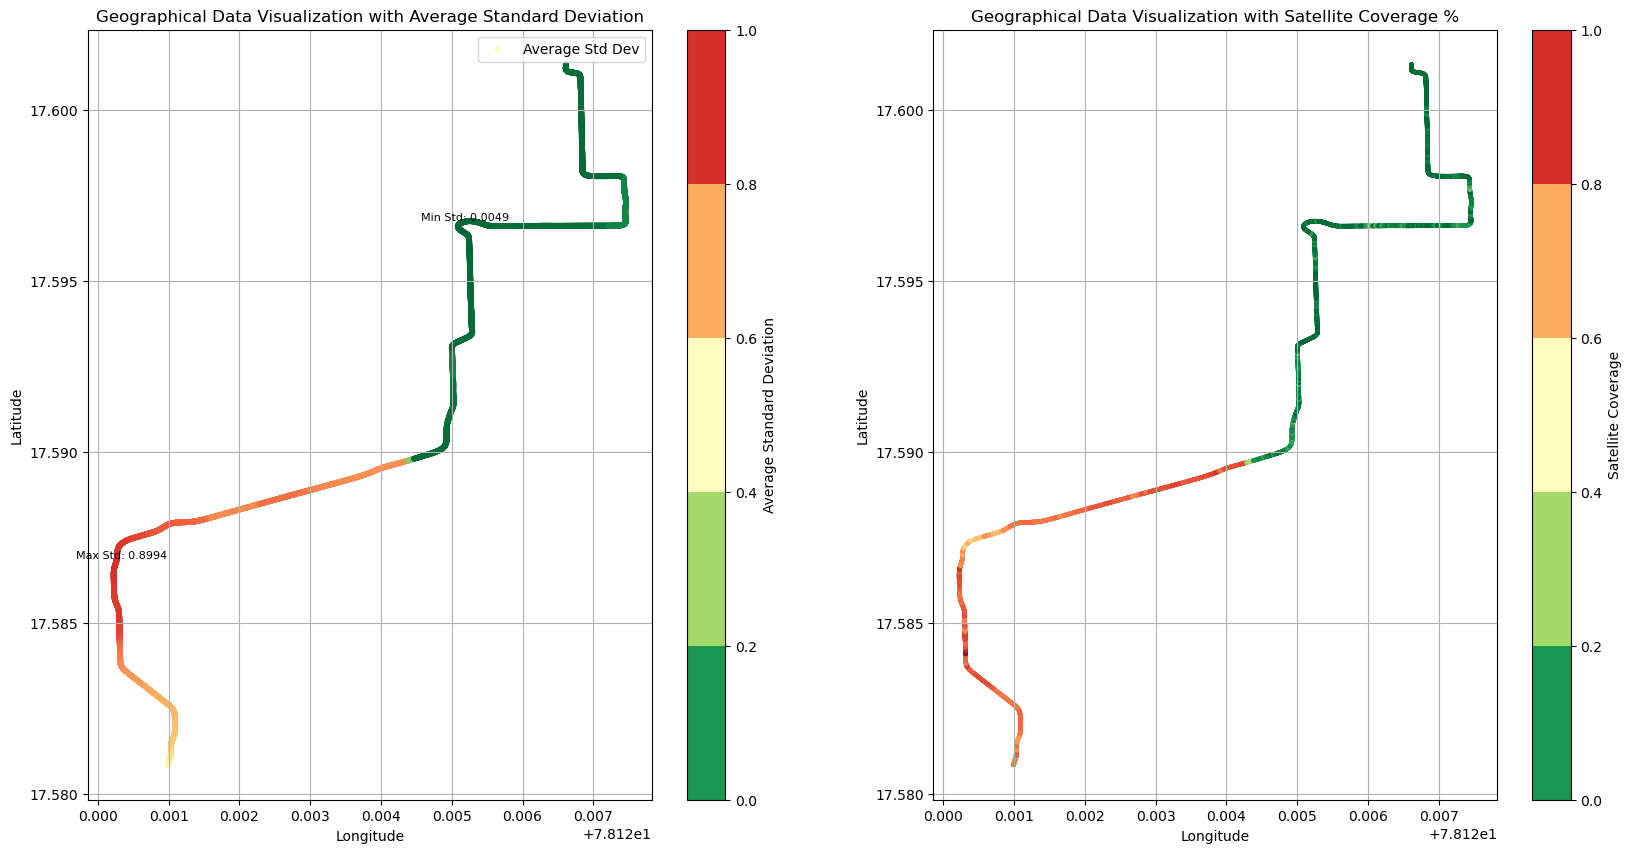

In [1]:
import matplotlib.pyplot as plt

# Read data from the text file
data = []
with open('/Users/ravitejakunchanapalli/Downloads/sd-maingatetestbed0.05.txt', 'r') as file:
    for line in file:
        values = line.strip().strip('[],').split(',')
        data.append([float(val) for val in values])

# Extract latitude, longitude, and standard deviations
latitudes = [row[0] for row in data]
longitudes = [row[1] for row in data]
std_latitudes = [row[2] for row in data]
std_longitudes = [row[3] for row in data]
percentage_changes = [(row[-1] - row[-2]) / row[-2] * 100 for row in data]

# Calculate the average of latitude and longitude standard deviations
avg_std = [(std_lat + std_lon) / 2 for std_lat, std_lon in zip(std_latitudes, std_longitudes)]

# Define custom color boundaries
custom_boundaries = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

# Create scatter plot for Average Std Dev
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(longitudes, latitudes, c=avg_std, s=10, cmap='RdYlGn_r', label='Average Std Dev', vmin=0, vmax=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Data Visualization with Average Standard Deviation')
plt.colorbar(label='Average Standard Deviation', boundaries=custom_boundaries)
plt.legend()
plt.grid()

# Find and annotate max and min standard deviations
max_std_index = avg_std.index(max(avg_std))
min_std_index = avg_std.index(min(avg_std))
plt.annotate(f'Max Std: {avg_std[max_std_index]:.4f}', (longitudes[max_std_index], latitudes[max_std_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
plt.annotate(f'Min Std: {avg_std[min_std_index]:.4f}', (longitudes[min_std_index], latitudes[min_std_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

# Normalize the percentage changes for coloring
min_pc = min(percentage_changes)
max_pc = max(percentage_changes)
norm_pc = [(pc - min_pc) / (max_pc - min_pc) for pc in percentage_changes]

# Create scatter plot for Satellite Coverage %
plt.subplot(122)
plt.scatter(longitudes, latitudes, c=norm_pc, s=5, cmap='RdYlGn_r', label='% Change', vmin=0, vmax=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Data Visualization with Satellite Coverage %')
plt.colorbar(label='Satellite Coverage', boundaries=custom_boundaries)
plt.grid()

plt.show()


## Satellite count,gdop,pdop,hdop plot in a single graph(old file)

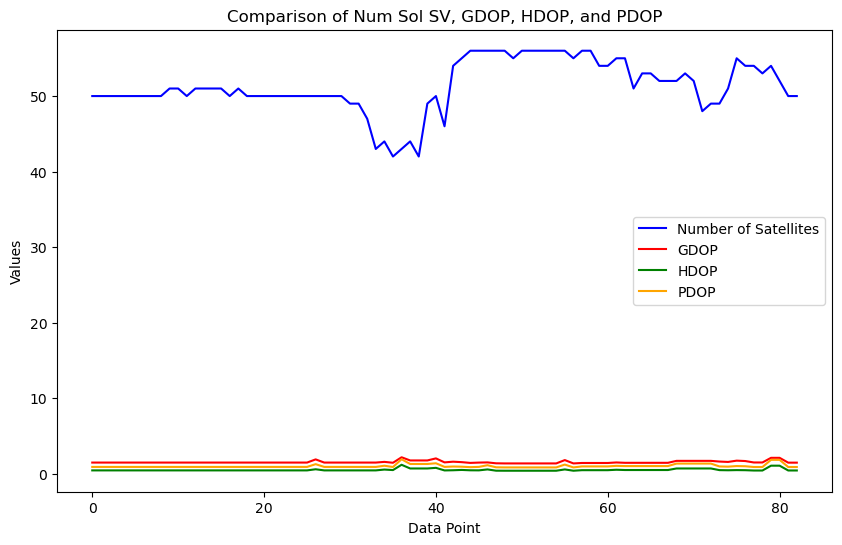

In [2]:
import matplotlib.pyplot as plt

# Read data from the text file
file_path = "/Users/ravitejakunchanapalli/Downloads/org_BESTPOS.ASCII"
with open(file_path, 'r') as file:
    data = file.readlines()

# Initialize lists to store parsed data
num_sol_svs = []

# Iterate through each line in the file
for line in data:
    # Split the line into log header and fields
    log_header, fields = line.split(';')

    # Split the fields into individual data points
    fields = fields.split(',')

    # Extracting relevant data (number of satellites)
    num_sol_sv = int(fields[14])

    # Store the parsed data in lists
    num_sol_svs.append(num_sol_sv)

## Reading another file for gdops and hdops
file_path1= "/Users/ravitejakunchanapalli/Downloads/org_RTKDOP2.ASCII"
with open(file_path1, 'r') as file1:
    data1= file1.readlines()

# Initialize lists to store parsed data
gdops = []
pdops=[]
hdops = []

# Iterate through each line in the file
for line in data1:
    # Split the line into log header and fields
    log_header, fields = line.split(';')
    
    # Split the fields into individual data points
    fields = fields.split(',')
    
    # Extracting relevant data (gdop, pdop, hdop)
    gdop = float(fields[0])
    pdop = float(fields[1])
    hdop = float(fields[2])
    
    # Store the parsed data in lists
    gdops.append(gdop)
    pdops.append(pdop)
    hdops.append(hdop)

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting num_sol_sv
ax.plot(num_sol_svs, color='blue', label='Number of Satellites')

# Plotting gdop
ax.plot(gdops, color='red', label='GDOP')

# Plotting hdop
ax.plot(hdops, color='green', label='HDOP')

# Plotting pdop
ax.plot(pdops, color='orange', label='PDOP')

# Adding labels and title
ax.set_xlabel('Data Point')
ax.set_ylabel('Values')
ax.set_title('Comparison of Num Sol SV, GDOP, HDOP, and PDOP')
ax.legend()

plt.show()


## Satellite count,gdop,pdop,hdop plot in a Two plots(old file)

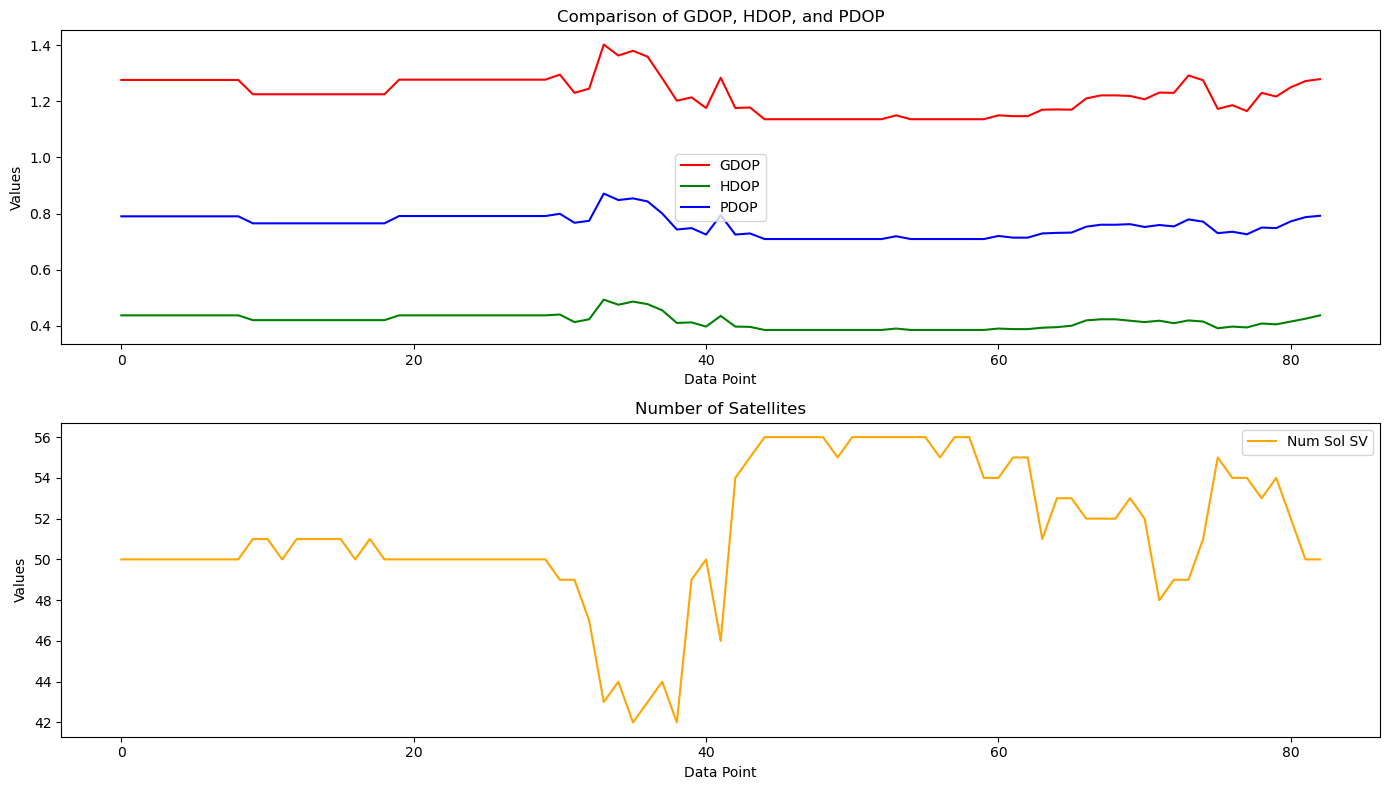

In [19]:
import matplotlib.pyplot as plt

# Read data from the text file
file_path = "/Users/ravitejakunchanapalli/Downloads/org_BESTPOS.ASCII"
with open(file_path, 'r') as file:
    data = file.readlines()

# Initialize lists to store parsed data
num_sol_svs = []

# Iterate through each line in the file
for line in data:
    # Split the line into log header and fields
    log_header, fields = line.split(';')

    # Split the fields into individual data points
    fields = fields.split(',')

    # Extracting relevant data (number of satellites)
    num_sol_sv = int(fields[14])

    # Store the parsed data in lists
    num_sol_svs.append(num_sol_sv)

## Reading another file for gdops and hdops
file_path1= "/Users/ravitejakunchanapalli/Downloads/org_PSRDOP22.ASCII"
with open(file_path1, 'r') as file1:
    data1= file1.readlines()

# Initialize lists to store parsed data
gdops = []
pdops=[]
hdops = []

# Iterate through each line in the file
for line in data1:
    # Split the line into log header and fields
    log_header, fields = line.split(';')
    
    # Split the fields into individual data points
    fields = fields.split(',')
    
    # Extracting relevant data (gdop, pdop, hdop)
    gdop = float(fields[0])
    pdop = float(fields[1])
    hdop = float(fields[2])
    
    # Store the parsed data in lists
    gdops.append(gdop)
    pdops.append(pdop)
    hdops.append(hdop)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,8))

# Plotting gdop, hdop, and pdop
ax1.plot(gdops, color='red', label='GDOP')
ax1.plot(hdops, color='green', label='HDOP')
ax1.plot(pdops, color='blue', label='PDOP')
ax1.set_xlabel('Data Point')
ax1.set_ylabel('Values')
ax1.set_title('Comparison of GDOP, HDOP, and PDOP')
ax1.legend()

# Plotting num_sol_sv
ax2.plot(num_sol_svs, color='orange', label='Num Sol SV')
ax2.set_xlabel('Data Point')
ax2.set_ylabel('Values')
ax2.set_title('Number of Satellites')
ax2.legend()

plt.tight_layout()
plt.show()


## Instead of avg_std using gdops value with (original)bestpos file and rtkdop2

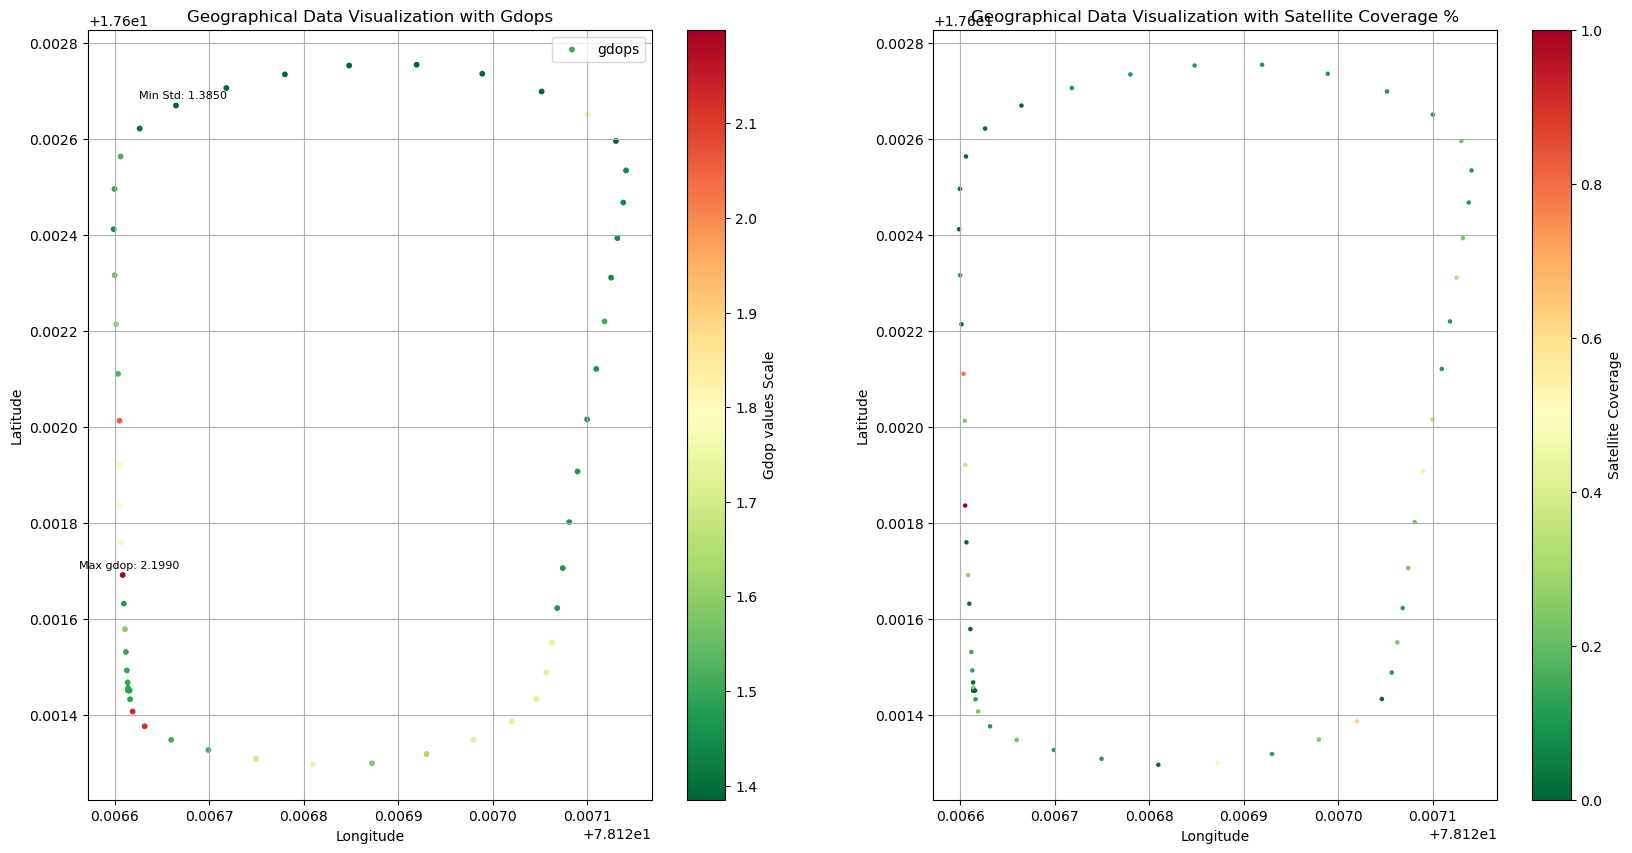

In [23]:
import matplotlib.pyplot as plt

# Read data from the text file
file_path = "/Users/ravitejakunchanapalli/Downloads/org_BESTPOS.ASCII"
with open(file_path, 'r') as file:
    data = file.readlines()

# Initialize lists to store parsed data
latitudes = []
longitudes = []
std_latitudes = []
std_longitudes = []
num_sol_svs = []
num_svs = []
percentage_changes = []

# Iterate through each line in the file
for line in data:
    # Split the line into log header and fields
    log_header, fields = line.split(';')

    # Split the fields into individual data points
    fields = fields.split(',')

    # Extracting relevant data (latitude, longitude, and height)
    lat = float(fields[2])
    lon = float(fields[3])
    heigh = float(fields[3])
    std_latitude = float(fields[7])
    std_longitude = float(fields[8])
    std_heigh = float(fields[9])
    num_sv = int(fields[13])
    num_sol_sv = int(fields[14])

    # Store the parsed data in lists
    latitudes.append(lat)
    longitudes.append(lon)
    std_latitudes.append(std_latitude)
    std_longitudes.append(std_longitude)
    num_svs.append(num_sv)
    num_sol_svs.append(num_sol_sv)

    # Calculate percentage change and append to list
    val = (num_sv - num_sol_sv) / num_sol_sv * 100
    percentage_changes.append(val)

# # Calculate the average of latitude and longitude standard deviations
# avg_std = [(std_lat + std_lon) / 2 for std_lat, std_lon in zip(std_latitudes, std_longitudes)]

## Reading another file for gdops and hdops
file_path1= "/Users/ravitejakunchanapalli/Downloads/org_RTKDOP2.ASCII"
with open(file_path1, 'r') as file1:
    data1= file1.readlines()

# Initialize lists to store parsed data
gdops = []
#hdops = []
# Iterate through each line in the file
for line in data1:
    # Split the line into log header and fields
    log_header, fields = line.split(';')
    
    # Split the fields into individual data points
    fields = fields.split(',')
    
    # Extracting relevant data (latitude, longitude, and height)
    gdop = float(fields[0])
    #hdop= float(fields[2])
    
    # Store the parsed data in lists
    gdops.append(gdop)
    #hdops.append(hdop)

# Create scatter plot
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(longitudes, latitudes, c=gdops, s=10, cmap='RdYlGn_r', label='gdops')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Data Visualization with Gdops')
plt.colorbar(label='Gdop values Scale')

# Find and annotate max and min gdops
max_gdop_index = gdops.index(max(gdops))
min_gdop_index = gdops.index(min(gdops))
plt.annotate(f'Max gdop: {gdops[max_gdop_index]:.4f}', (longitudes[max_gdop_index], latitudes[max_gdop_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
plt.annotate(f'Min Std: {gdops[min_gdop_index]:.4f}', (longitudes[min_gdop_index], latitudes[min_gdop_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

plt.legend()
plt.grid()

# Normalize the percentage changes for coloring
min_pc = min(percentage_changes)
max_pc = max(percentage_changes)
norm_pc = [(pc - min_pc) / (max_pc - min_pc) for pc in percentage_changes]

plt.subplot(122)
plt.scatter(longitudes, latitudes, c=norm_pc, s=5, cmap='RdYlGn_r', label='% Change')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Data Visualization with Satellite Coverage %')
plt.colorbar(label='Satellite Coverage')
plt.grid()
plt.show()


## Instead of avg_std using hdops value with (original)bestpos file and rtkdop2

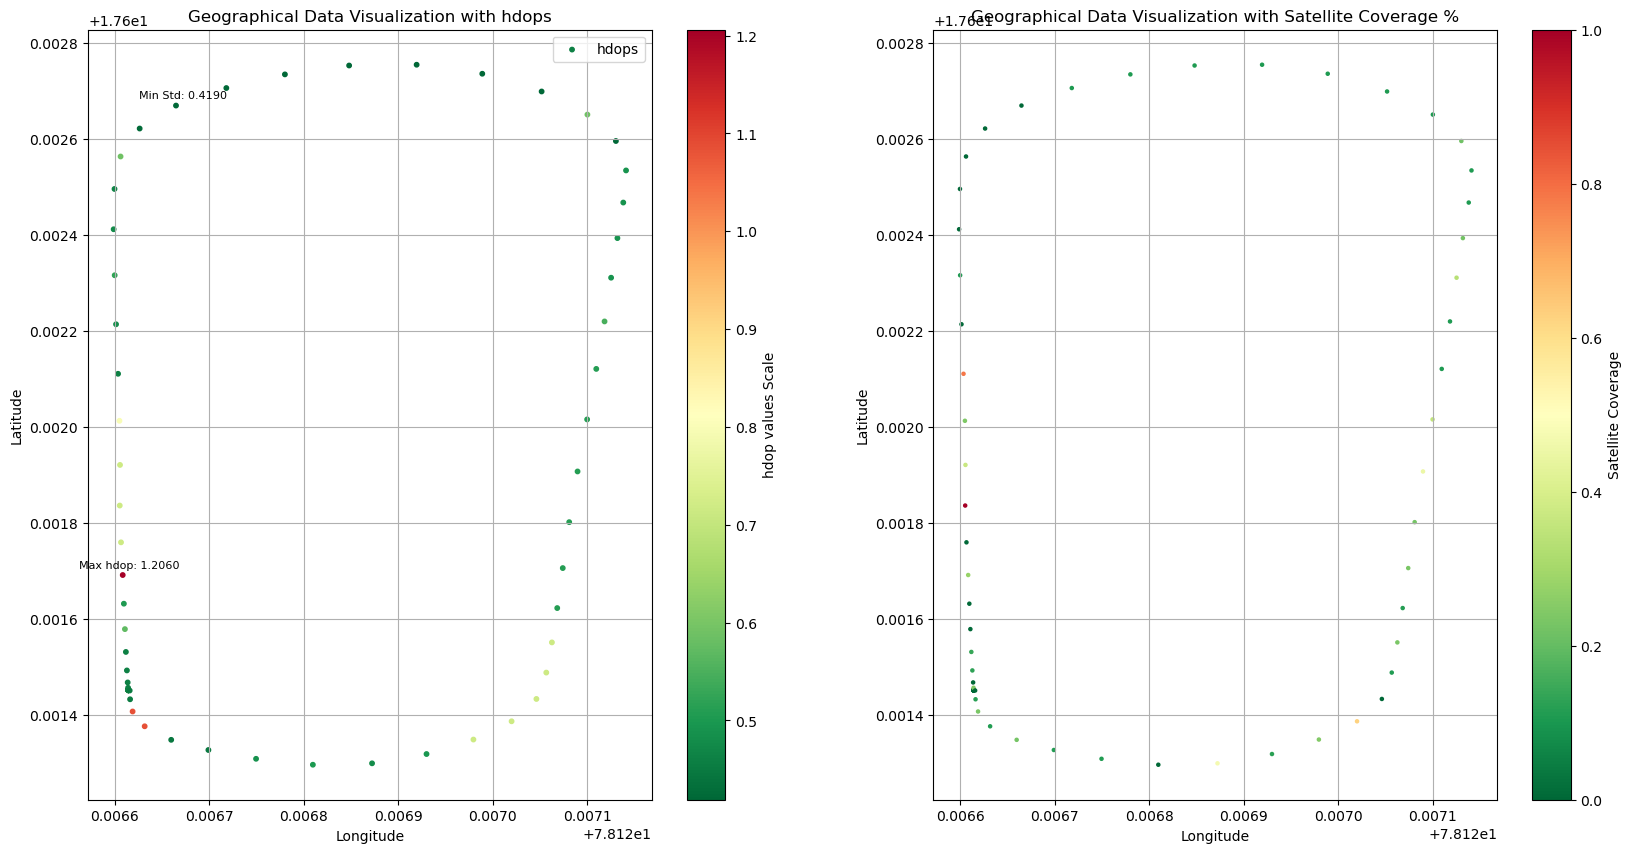

In [24]:
import matplotlib.pyplot as plt

# Read data from the text file
file_path = "/Users/ravitejakunchanapalli/Downloads/org_BESTPOS.ASCII"
with open(file_path, 'r') as file:
    data = file.readlines()

# Initialize lists to store parsed data
latitudes = []
longitudes = []
std_latitudes = []
std_longitudes = []
num_sol_svs = []
num_svs = []
percentage_changes = []

# Iterate through each line in the file
for line in data:
    # Split the line into log header and fields
    log_header, fields = line.split(';')

    # Split the fields into individual data points
    fields = fields.split(',')

    # Extracting relevant data (latitude, longitude, and height)
    lat = float(fields[2])
    lon = float(fields[3])
    heigh = float(fields[3])
    std_latitude = float(fields[7])
    std_longitude = float(fields[8])
    std_heigh = float(fields[9])
    num_sv = int(fields[13])
    num_sol_sv = int(fields[14])

    # Store the parsed data in lists
    latitudes.append(lat)
    longitudes.append(lon)
    std_latitudes.append(std_latitude)
    std_longitudes.append(std_longitude)
    num_svs.append(num_sv)
    num_sol_svs.append(num_sol_sv)

    # Calculate percentage change and append to list
    val = (num_sv - num_sol_sv) / num_sol_sv * 100
    percentage_changes.append(val)

# # Calculate the average of latitude and longitude standard deviations
# avg_std = [(std_lat + std_lon) / 2 for std_lat, std_lon in zip(std_latitudes, std_longitudes)]

## Reading another file for gdops and hdops
file_path1= "/Users/ravitejakunchanapalli/Downloads/org_RTKDOP2.ASCII"
with open(file_path1, 'r') as file1:
    data1= file1.readlines()

# Initialize lists to store parsed data
#gdops = []
hdops = []
# Iterate through each line in the file
for line in data1:
    # Split the line into log header and fields
    log_header, fields = line.split(';')
    
    # Split the fields into individual data points
    fields = fields.split(',')
    
    # Extracting relevant data (latitude, longitude, and height)
    #gdop = float(fields[0])
    hdop= float(fields[2])
    
    # Store the parsed data in lists
    #gdops.append(gdop)
    hdops.append(hdop)

# Create scatter plot
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(longitudes, latitudes, c=hdops, s=10, cmap='RdYlGn_r', label='hdops')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Data Visualization with hdops')
plt.colorbar(label='hdop values Scale')

# Find and annotate max and min hdops
max_hdop_index = hdops.index(max(hdops))
min_hdop_index = hdops.index(min(hdops))
plt.annotate(f'Max hdop: {hdops[max_hdop_index]:.4f}', (longitudes[max_hdop_index], latitudes[max_hdop_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
plt.annotate(f'Min Std: {hdops[min_hdop_index]:.4f}', (longitudes[min_hdop_index], latitudes[min_hdop_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

plt.legend()
plt.grid()

# Normalize the percentage changes for coloring
min_pc = min(percentage_changes)
max_pc = max(percentage_changes)
norm_pc = [(pc - min_pc) / (max_pc - min_pc) for pc in percentage_changes]

plt.subplot(122)
plt.scatter(longitudes, latitudes, c=norm_pc, s=5, cmap='RdYlGn_r', label='% Change')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Data Visualization with Satellite Coverage %')
plt.colorbar(label='Satellite Coverage')
plt.grid()
plt.show()


## Hdop,pdop,gdop and satellie plotting using original bestpos file(PSRDOP2)

mean_gdops 1.2239759036144577
max_gdops 1.402
min_gdops 1.136
mean_pdops 0.7598192771084337
max_pdops 0.871
min_pdops 0.709
mean_hdops 0.41683132530120476
max_hdops 0.493
min_hdops 0.385


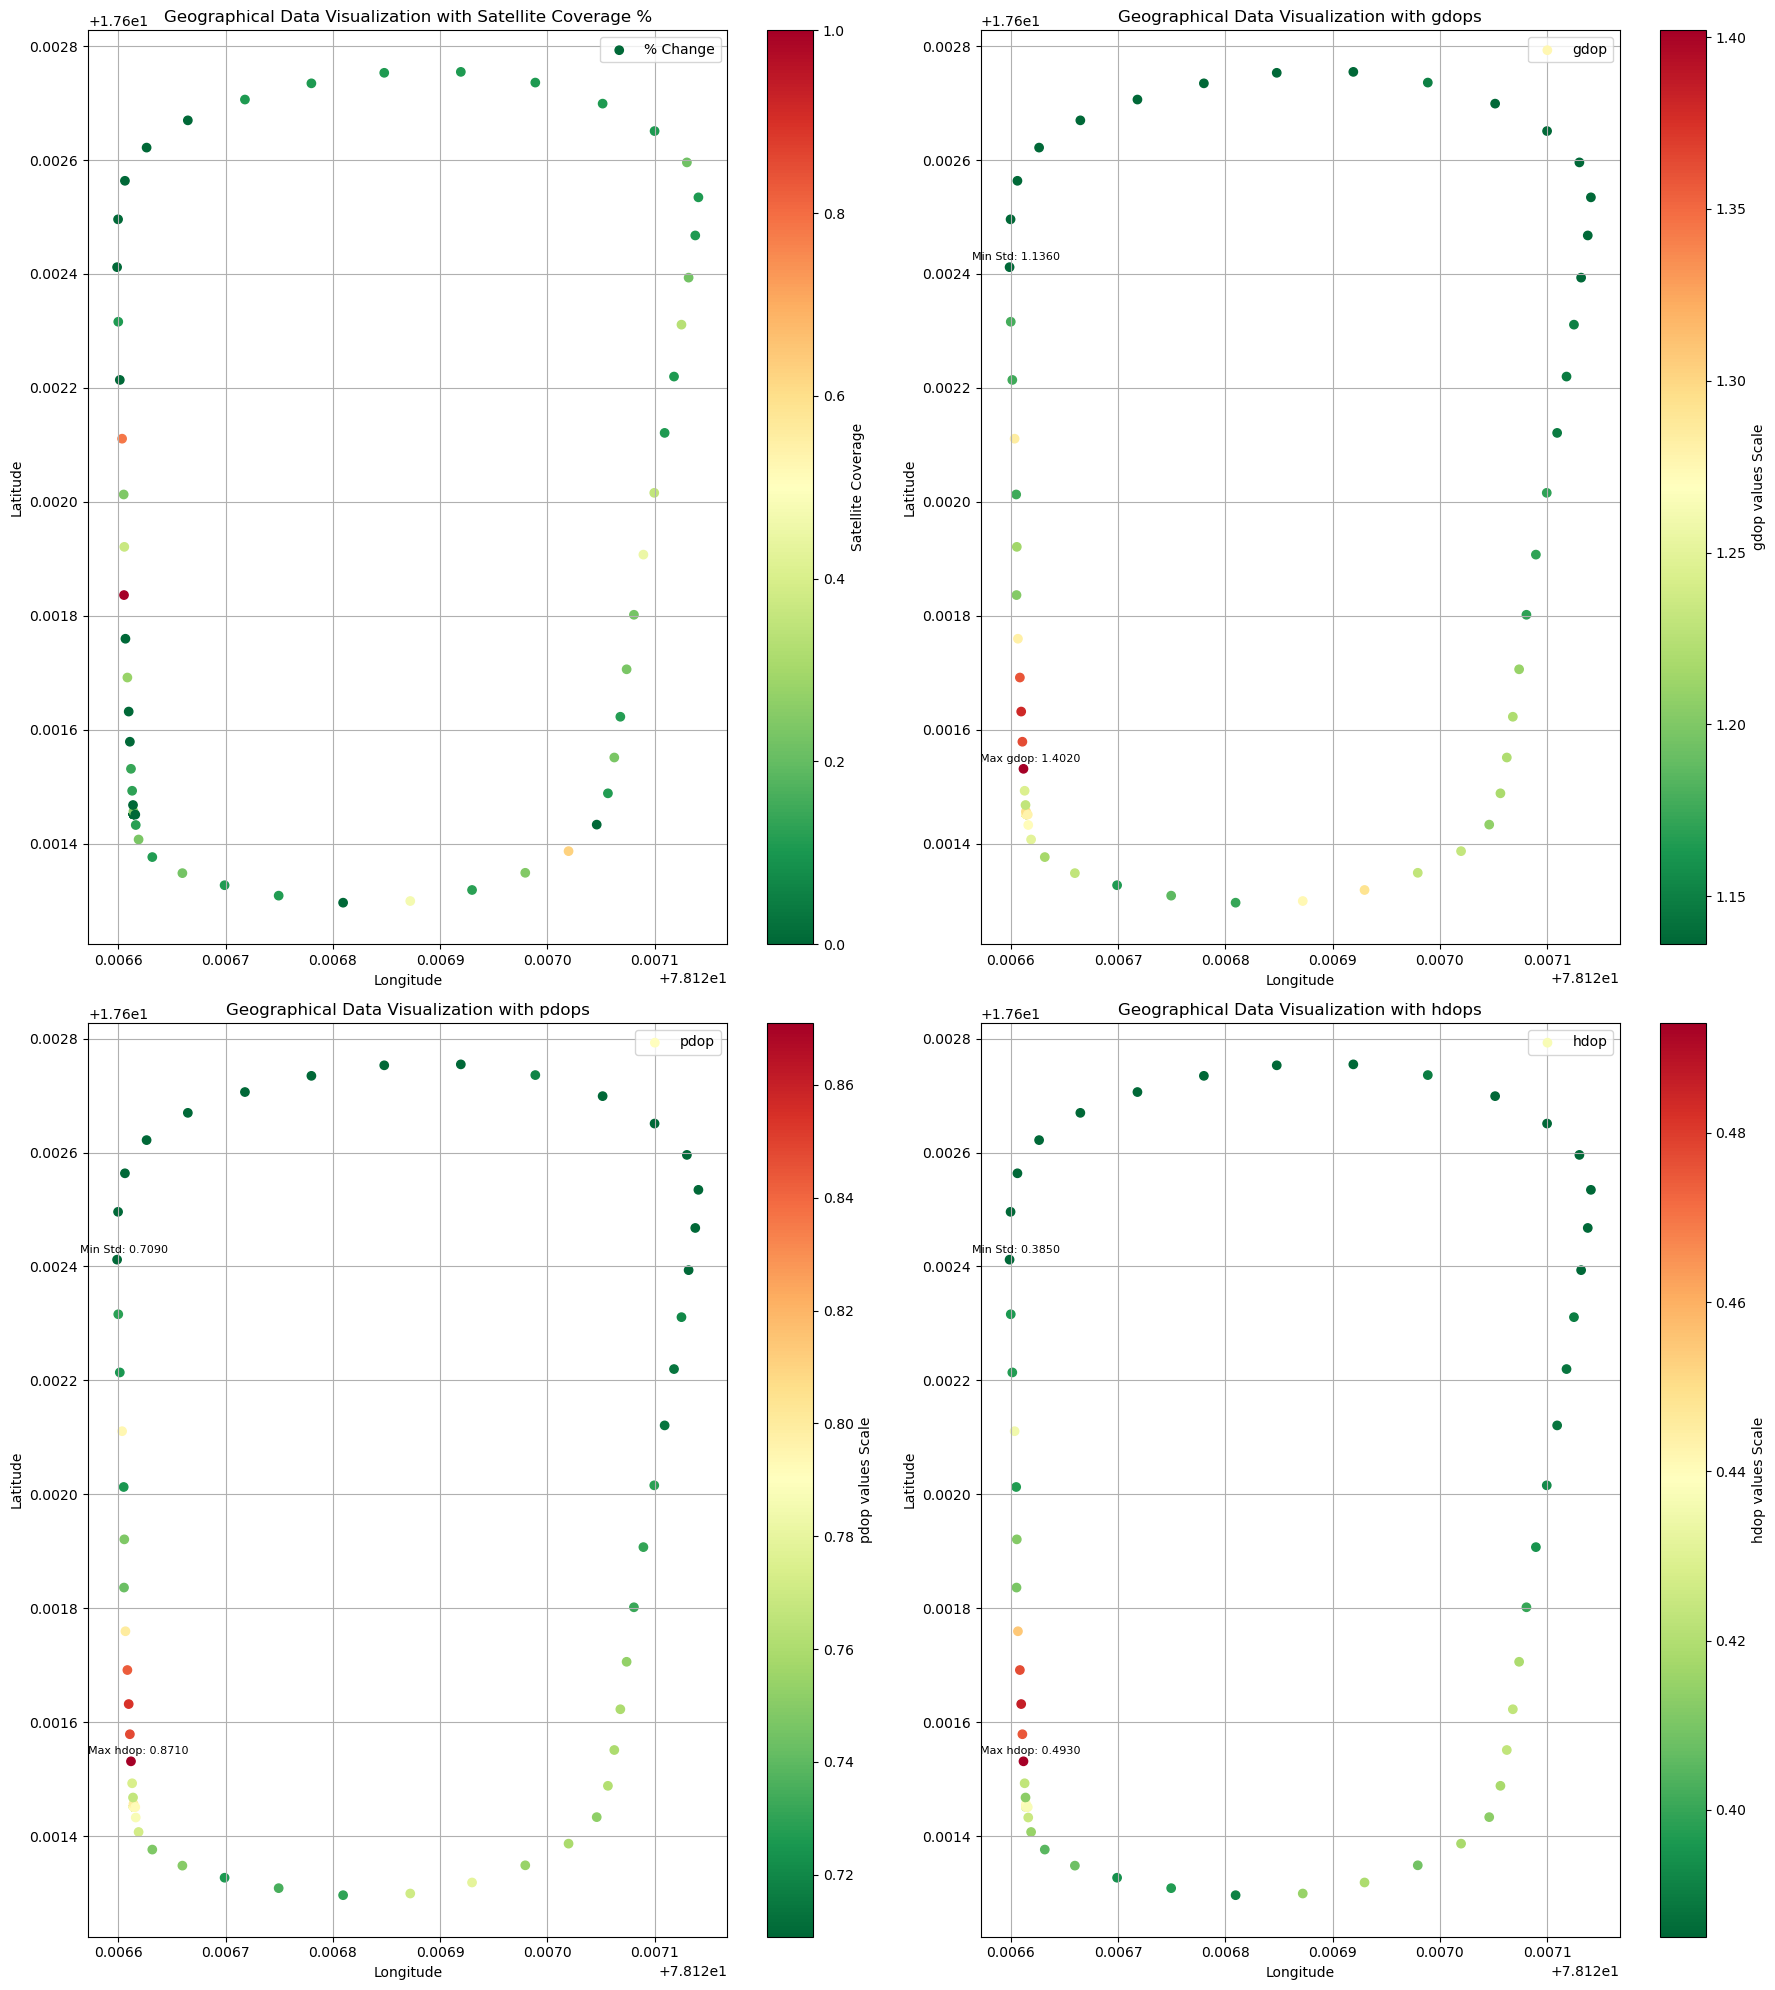

In [15]:
import matplotlib.pyplot as plt

# Read data from the text file
file_path = "/Users/ravitejakunchanapalli/Downloads/org_BESTPOS.ASCII"
with open(file_path, 'r') as file:
    data = file.readlines()

# Initialize lists to store parsed data
latitudes = []
longitudes = []
std_latitudes = []
std_longitudes = []
num_sol_svs = []
num_svs = []
percentage_changes = []

# Iterate through each line in the file
for line in data:
    # Split the line into log header and fields
    log_header, fields = line.split(';')

    # Split the fields into individual data points
    fields = fields.split(',')

    # Extracting relevant data (latitude, longitude, and height)
    lat = float(fields[2])
    lon = float(fields[3])
    heigh = float(fields[3])
    std_latitude = float(fields[7])
    std_longitude = float(fields[8])
    std_heigh = float(fields[9])
    num_sv = int(fields[13])
    num_sol_sv = int(fields[14])

    # Store the parsed data in lists
    latitudes.append(lat)
    longitudes.append(lon)
    std_latitudes.append(std_latitude)
    std_longitudes.append(std_longitude)
    num_svs.append(num_sv)
    num_sol_svs.append(num_sol_sv)

    # Calculate percentage change and append to list
    val = (num_sv - num_sol_sv) / num_sol_sv * 100
    percentage_changes.append(val)

# # Calculate the average of latitude and longitude standard deviations
# avg_std = [(std_lat + std_lon) / 2 for std_lat, std_lon in zip(std_latitudes, std_longitudes)]

## Reading another file for gdops and hdops
file_path1= "/Users/ravitejakunchanapalli/Downloads/org_PSRDOP22.ASCII"
with open(file_path1, 'r') as file1:
    data1= file1.readlines()

# Initialize lists to store parsed data
gdops = []
pdops=[]
hdops = []
# Iterate through each line in the file
for line in data1:
    # Split the line into log header and fields
    log_header, fields = line.split(';')
    
    # Split the fields into individual data points
    fields = fields.split(',')
    
    # Extracting relevant data (latitude, longitude, and height)
    gdop = float(fields[0])
    pdop = float(fields[1])
    hdop = float(fields[2])
    
    # Store the parsed data in lists
    gdops.append(gdop)
    pdops.append(pdop)
    hdops.append(hdop)
print("mean_gdops",np.mean(gdops))
print("max_gdops",max(gdops))
print("min_gdops",min(gdops))
print("mean_pdops",np.mean(pdops))
print("max_pdops",max(pdops))
print("min_pdops",min(pdops))
print("mean_hdops",np.mean(hdops))
print("max_hdops",max(hdops))
print("min_hdops",min(hdops))
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 20))

###############################Plot for hdop
scatter_hdop = axs[1, 1].scatter(longitudes, latitudes, c=hdops, cmap='RdYlGn_r', label='hdop')
axs[1, 1].set_xlabel('Longitude')
axs[1, 1].set_ylabel('Latitude')
axs[1, 1].set_title('Geographical Data Visualization with hdops')
cbar_hdop = fig.colorbar(scatter_hdop, ax=axs[1, 1])
cbar_hdop.set_label('hdop values Scale')


# Find and annotate max and min hdops
max_hdop_index = hdops.index(max(hdops))
min_hdop_index = hdops.index(min(hdops))
axs[1,1].annotate(f'Max hdop: {hdops[max_hdop_index]:.4f}', (longitudes[max_hdop_index], latitudes[max_hdop_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
axs[1,1].annotate(f'Min Std: {hdops[min_hdop_index]:.4f}', (longitudes[min_hdop_index], latitudes[min_hdop_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

axs[1, 1].legend()
axs[1, 1].grid()


###############################Plot for gdop
scatter_gdop = axs[0, 1].scatter(longitudes, latitudes, c=gdops, cmap='RdYlGn_r', label='gdop')
axs[0, 1].set_xlabel('Longitude')
axs[0, 1].set_ylabel('Latitude')
axs[0, 1].set_title('Geographical Data Visualization with gdops')
cbar_gdop = fig.colorbar(scatter_gdop, ax=axs[0, 1])
cbar_gdop.set_label('gdop values Scale')


# Find and annotate max and min gdops
max_gdop_index = gdops.index(max(gdops))
min_gdop_index = gdops.index(min(gdops))
axs[0,1].annotate(f'Max gdop: {gdops[max_gdop_index]:.4f}', (longitudes[max_gdop_index], latitudes[max_gdop_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
axs[0,1].annotate(f'Min Std: {gdops[min_gdop_index]:.4f}', (longitudes[min_gdop_index], latitudes[min_gdop_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

axs[0, 1].legend()
axs[0, 1].grid()


###############################Plot for pdop
scatter_pdop = axs[1, 0].scatter(longitudes, latitudes, c=pdops, cmap='RdYlGn_r', label='pdop')
axs[1, 0].set_xlabel('Longitude')
axs[1, 0].set_ylabel('Latitude')
axs[1, 0].set_title('Geographical Data Visualization with pdops')
cbar_pdop = fig.colorbar(scatter_pdop, ax=axs[1, 0])
cbar_pdop.set_label('pdop values Scale')


# Find and annotate max and min pdops
max_pdop_index = pdops.index(max(pdops))
min_pdop_index = pdops.index(min(pdops))
axs[1,0].annotate(f'Max hdop: {pdops[max_pdop_index]:.4f}', (longitudes[max_pdop_index], latitudes[max_pdop_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
axs[1,0].annotate(f'Min Std: {pdops[min_pdop_index]:.4f}', (longitudes[min_pdop_index], latitudes[min_pdop_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

axs[1, 0].legend()
axs[1, 0].grid()


###############################Satellite Coverage
# Normalize the percentage changes for coloring
min_pc = min(percentage_changes)
max_pc = max(percentage_changes)
norm_pc = [(pc - min_pc) / (max_pc - min_pc) for pc in percentage_changes]

scatter_percentage = axs[0, 0].scatter(longitudes, latitudes, c=norm_pc, cmap='RdYlGn_r', label='% Change')
axs[0, 0].set_xlabel('Longitude')
axs[0, 0].set_ylabel('Latitude')
axs[0, 0].set_title('Geographical Data Visualization with Satellite Coverage %')
axs[0, 0].legend()
axs[0, 0].grid()
cbar_percentage = fig.colorbar(scatter_percentage, ax=axs[0, 0])
cbar_percentage.set_label('Satellite Coverage')

plt.tight_layout()

plt.show()



## Hdop,pdop,gdop and satellie plotting using original bestpos file(RTKDOP2)

mean_gdops 1.5552289156626502
max_gdops 2.199
min_gdops 1.385
mean_pdops 1.0261686746987952
max_pdops 1.937
min_pdops 0.856
mean_hdops 0.5245180722891566
max_hdops 1.206
min_hdops 0.419


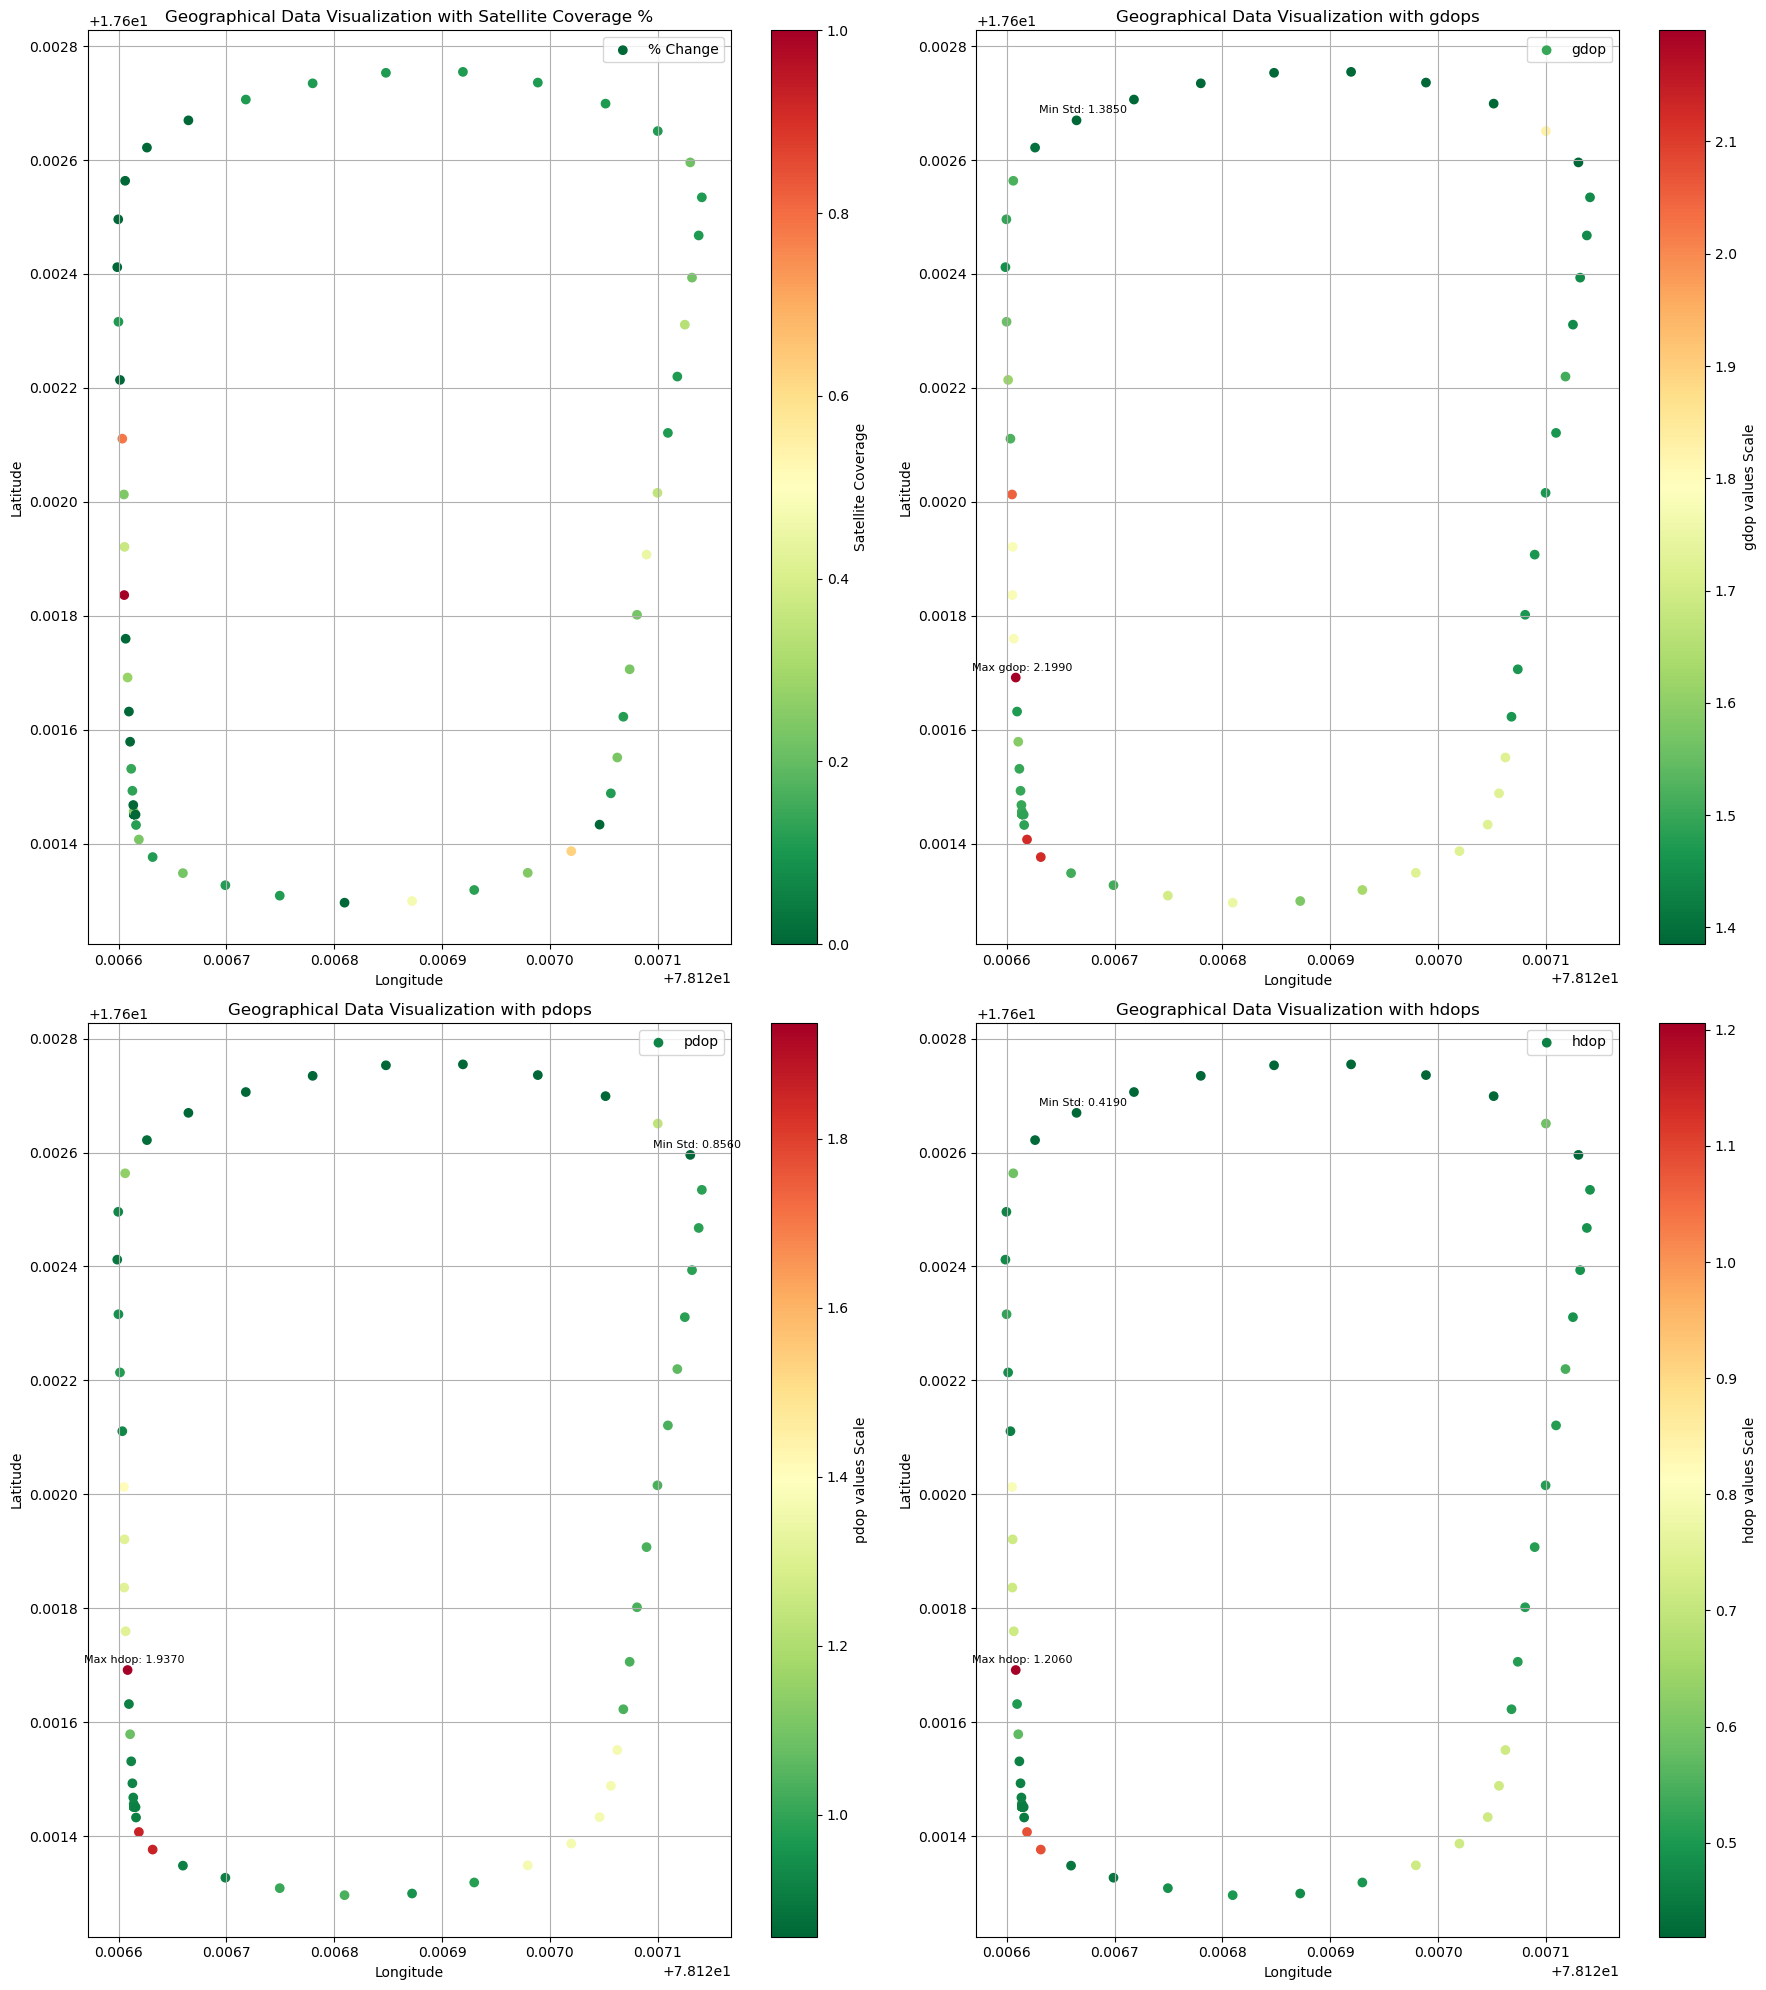

In [14]:
import matplotlib.pyplot as plt

# Read data from the text file
file_path = "/Users/ravitejakunchanapalli/Downloads/org_BESTPOS.ASCII"
with open(file_path, 'r') as file:
    data = file.readlines()

# Initialize lists to store parsed data
latitudes = []
longitudes = []
std_latitudes = []
std_longitudes = []
num_sol_svs = []
num_svs = []
percentage_changes = []

# Iterate through each line in the file
for line in data:
    # Split the line into log header and fields
    log_header, fields = line.split(';')

    # Split the fields into individual data points
    fields = fields.split(',')

    # Extracting relevant data (latitude, longitude, and height)
    lat = float(fields[2])
    lon = float(fields[3])
    heigh = float(fields[3])
    std_latitude = float(fields[7])
    std_longitude = float(fields[8])
    std_heigh = float(fields[9])
    num_sv = int(fields[13])
    num_sol_sv = int(fields[14])

    # Store the parsed data in lists
    latitudes.append(lat)
    longitudes.append(lon)
    std_latitudes.append(std_latitude)
    std_longitudes.append(std_longitude)
    num_svs.append(num_sv)
    num_sol_svs.append(num_sol_sv)

    # Calculate percentage change and append to list
    val = (num_sv - num_sol_sv) / num_sol_sv * 100
    percentage_changes.append(val)

# # Calculate the average of latitude and longitude standard deviations
# avg_std = [(std_lat + std_lon) / 2 for std_lat, std_lon in zip(std_latitudes, std_longitudes)]

## Reading another file for gdops and hdops
file_path1= "/Users/ravitejakunchanapalli/Downloads/org_RTKDOP22.ASCII"
with open(file_path1, 'r') as file1:
    data1= file1.readlines()

# Initialize lists to store parsed data
gdops = []
pdops=[]
hdops = []
# Iterate through each line in the file
for line in data1:
    # Split the line into log header and fields
    log_header, fields = line.split(';')
    
    # Split the fields into individual data points
    fields = fields.split(',')
    
    # Extracting relevant data (latitude, longitude, and height)
    gdop = float(fields[0])
    pdop = float(fields[1])
    hdop = float(fields[2])
    
    # Store the parsed data in lists
    gdops.append(gdop)
    pdops.append(pdop)
    hdops.append(hdop)
print("mean_gdops",np.mean(gdops))
print("max_gdops",max(gdops))
print("min_gdops",min(gdops))
print("mean_pdops",np.mean(pdops))
print("max_pdops",max(pdops))
print("min_pdops",min(pdops))
print("mean_hdops",np.mean(hdops))
print("max_hdops",max(hdops))
print("min_hdops",min(hdops))
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 20))

###############################Plot for hdop
scatter_hdop = axs[1, 1].scatter(longitudes, latitudes, c=hdops, cmap='RdYlGn_r', label='hdop')
axs[1, 1].set_xlabel('Longitude')
axs[1, 1].set_ylabel('Latitude')
axs[1, 1].set_title('Geographical Data Visualization with hdops')
cbar_hdop = fig.colorbar(scatter_hdop, ax=axs[1, 1])
cbar_hdop.set_label('hdop values Scale')


# Find and annotate max and min hdops
max_hdop_index = hdops.index(max(hdops))
min_hdop_index = hdops.index(min(hdops))
axs[1,1].annotate(f'Max hdop: {hdops[max_hdop_index]:.4f}', (longitudes[max_hdop_index], latitudes[max_hdop_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
axs[1,1].annotate(f'Min Std: {hdops[min_hdop_index]:.4f}', (longitudes[min_hdop_index], latitudes[min_hdop_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

axs[1, 1].legend()
axs[1, 1].grid()


###############################Plot for gdop
scatter_gdop = axs[0, 1].scatter(longitudes, latitudes, c=gdops, cmap='RdYlGn_r', label='gdop')
axs[0, 1].set_xlabel('Longitude')
axs[0, 1].set_ylabel('Latitude')
axs[0, 1].set_title('Geographical Data Visualization with gdops')
cbar_gdop = fig.colorbar(scatter_gdop, ax=axs[0, 1])
cbar_gdop.set_label('gdop values Scale')


# Find and annotate max and min gdops
max_gdop_index = gdops.index(max(gdops))
min_gdop_index = gdops.index(min(gdops))
axs[0,1].annotate(f'Max gdop: {gdops[max_gdop_index]:.4f}', (longitudes[max_gdop_index], latitudes[max_gdop_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
axs[0,1].annotate(f'Min Std: {gdops[min_gdop_index]:.4f}', (longitudes[min_gdop_index], latitudes[min_gdop_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

axs[0, 1].legend()
axs[0, 1].grid()


###############################Plot for pdop
scatter_pdop = axs[1, 0].scatter(longitudes, latitudes, c=pdops, cmap='RdYlGn_r', label='pdop')
axs[1, 0].set_xlabel('Longitude')
axs[1, 0].set_ylabel('Latitude')
axs[1, 0].set_title('Geographical Data Visualization with pdops')
cbar_pdop = fig.colorbar(scatter_pdop, ax=axs[1, 0])
cbar_pdop.set_label('pdop values Scale')


# Find and annotate max and min pdops
max_pdop_index = pdops.index(max(pdops))
min_pdop_index = pdops.index(min(pdops))
axs[1,0].annotate(f'Max hdop: {pdops[max_pdop_index]:.4f}', (longitudes[max_pdop_index], latitudes[max_pdop_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
axs[1,0].annotate(f'Min Std: {pdops[min_pdop_index]:.4f}', (longitudes[min_pdop_index], latitudes[min_pdop_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

axs[1, 0].legend()
axs[1, 0].grid()


###############################Satellite Coverage
# Normalize the percentage changes for coloring
min_pc = min(percentage_changes)
max_pc = max(percentage_changes)
norm_pc = [(pc - min_pc) / (max_pc - min_pc) for pc in percentage_changes]

scatter_percentage = axs[0, 0].scatter(longitudes, latitudes, c=norm_pc, cmap='RdYlGn_r', label='% Change')
axs[0, 0].set_xlabel('Longitude')
axs[0, 0].set_ylabel('Latitude')
axs[0, 0].set_title('Geographical Data Visualization with Satellite Coverage %')
axs[0, 0].legend()
axs[0, 0].grid()
cbar_percentage = fig.colorbar(scatter_percentage, ax=axs[0, 0])
cbar_percentage.set_label('Satellite Coverage')

plt.tight_layout()

plt.show()



## Hdop,pdop,gdop and satellie plotting using New bestpos file

File 1 line count: 1293
File 2 line count: 1288
Minimum line count: 1288


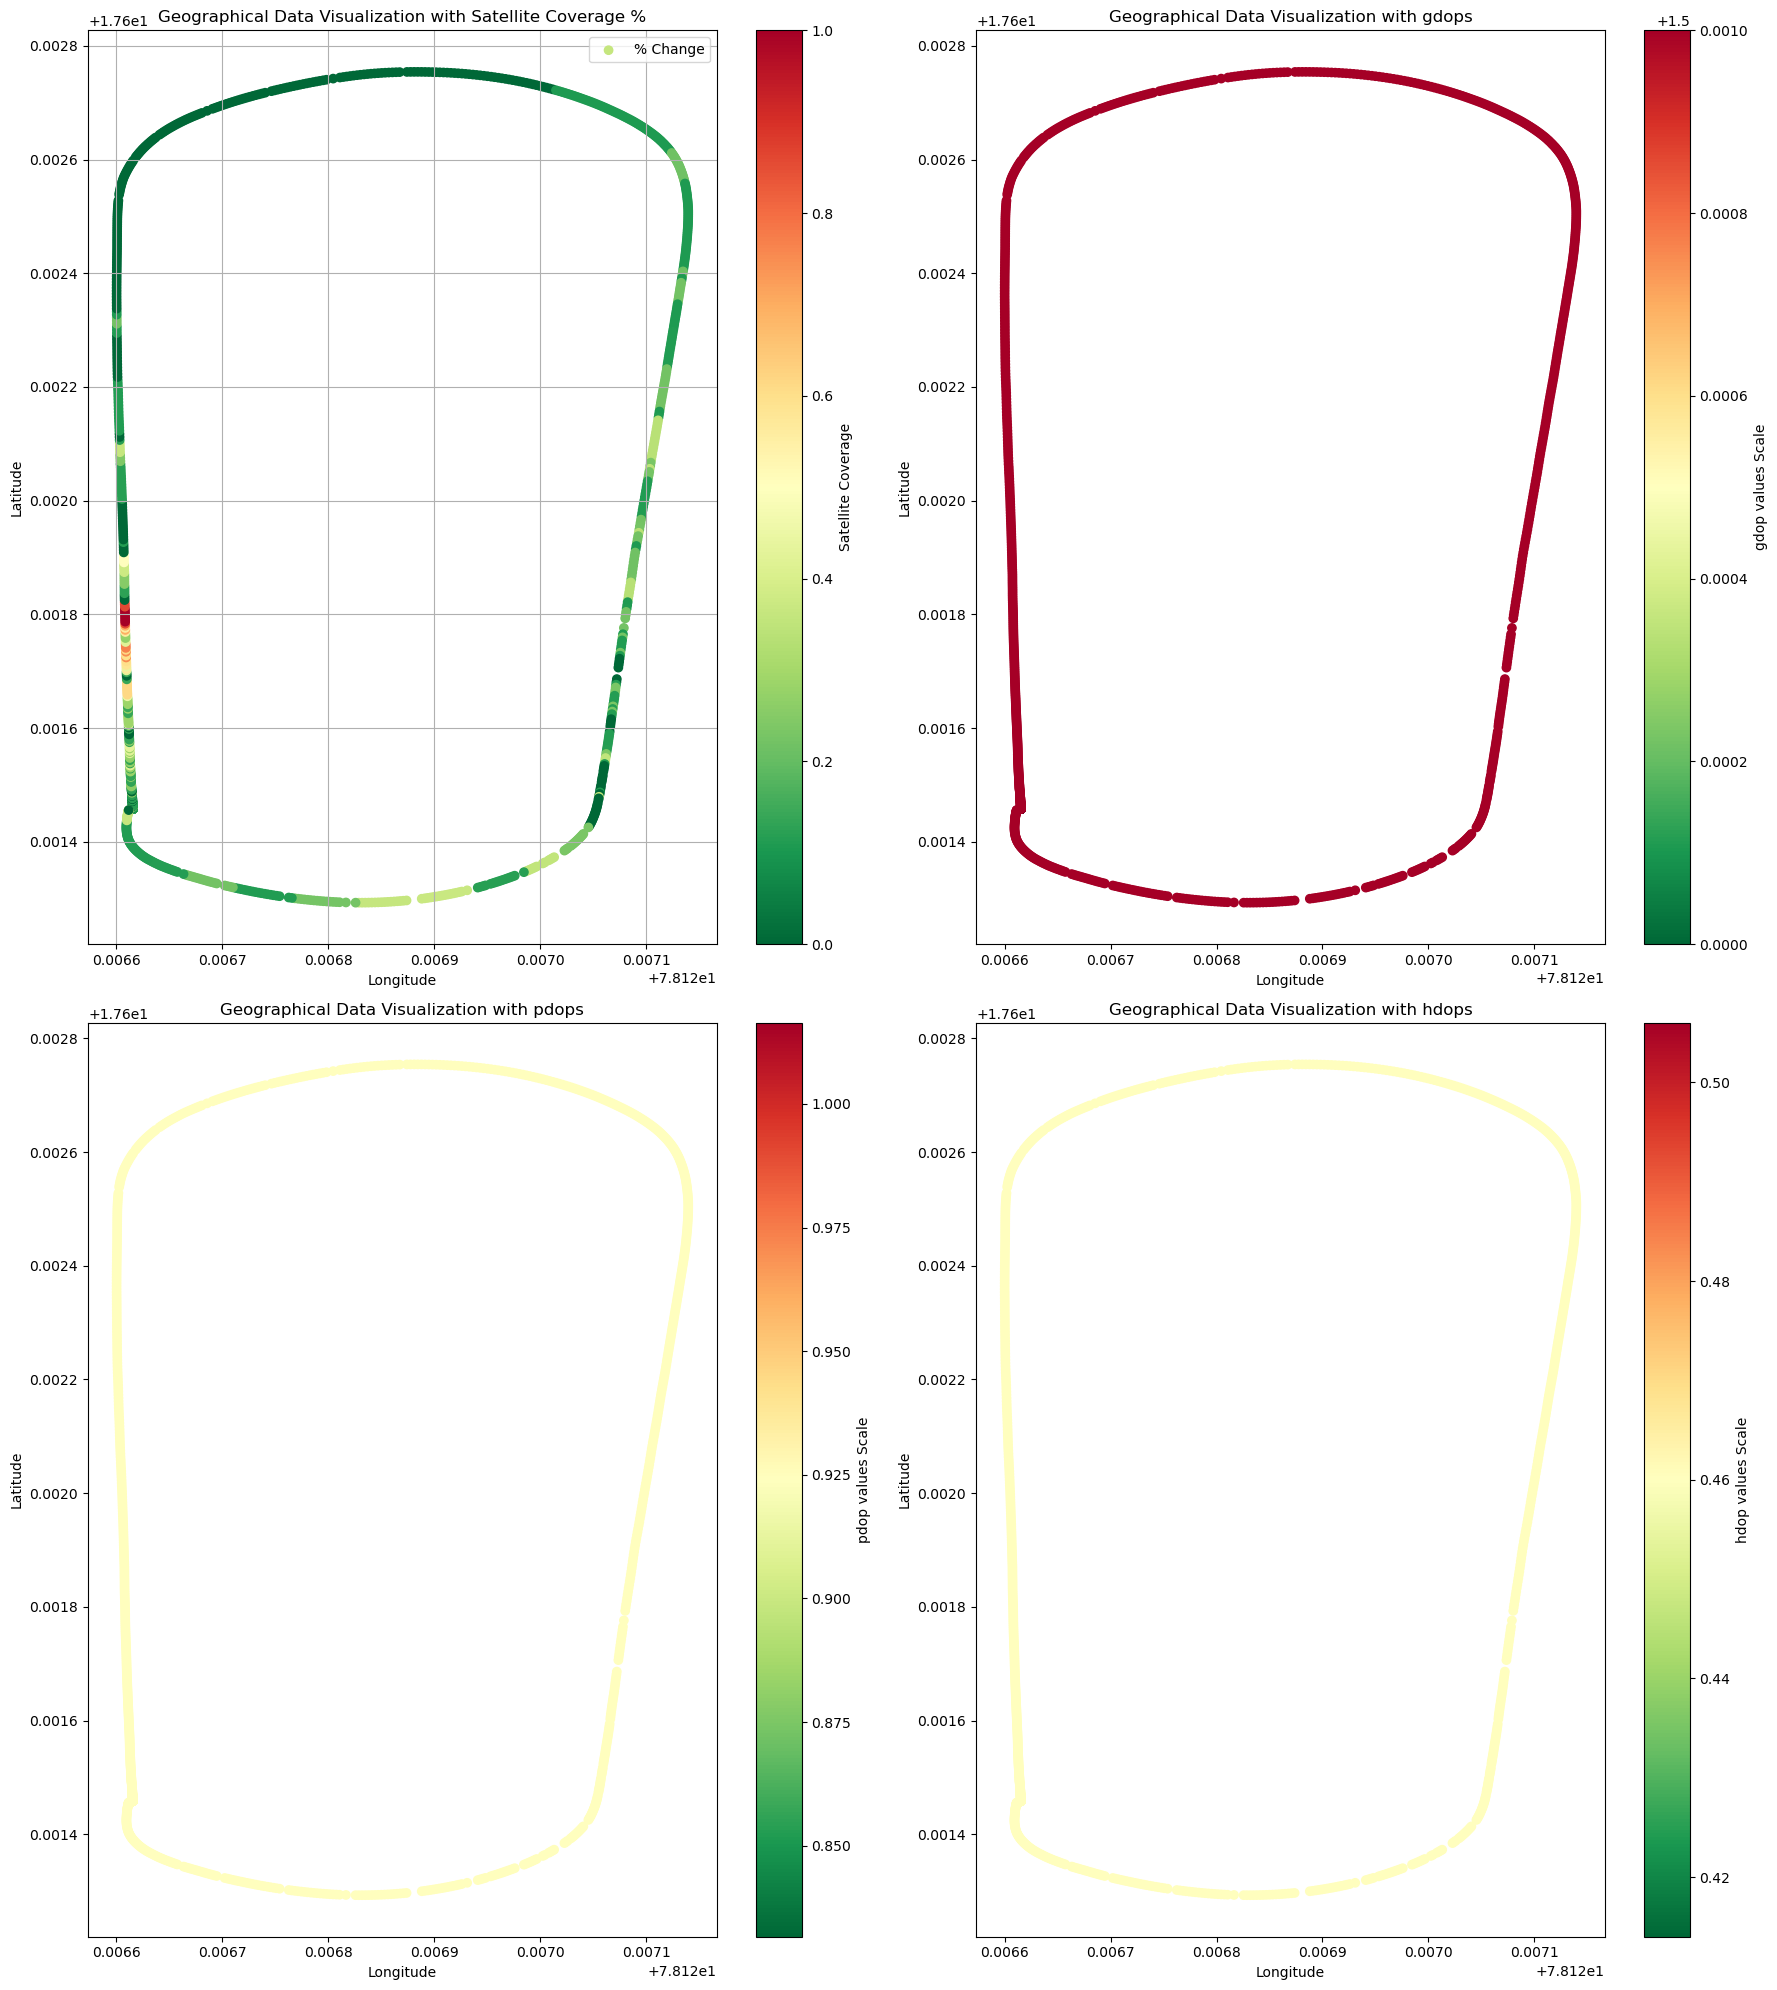

In [13]:
import matplotlib.pyplot as plt

# Read data from the first text file
file_path1 = "/Users/ravitejakunchanapalli/Downloads/mod_BESTPOS_mo.ASCII"
with open(file_path1, 'r') as file1:
    data1 = file1.readlines()
print("File 1 line count:", len(data1))

# Read data from the second text file
file_path2 = "/Users/ravitejakunchanapalli/Downloads/mod_RTKDOP2_mo.ASCII"
with open(file_path2, 'r') as file2:
    data2 = file2.readlines()
print("File 2 line count:", len(data2))

# Determine the minimum line count
min_line_count = min(len(data1), len(data2))
print("Minimum line count:", min_line_count)

# Initialize lists to store parsed data
latitudes = []
longitudes = []
gdops = []
pdops = []
hdops = []
percentage_changes = []

# Iterate through each line in the files, truncating to the minimum line count
for line1, line2 in zip(data1[:min_line_count], data2[:min_line_count]):
    # Parsing data from the first file
    log_header1, fields1 = line1.split(';')
    fields1 = fields1.split(',')
    latitudes.append(float(fields1[2]))
    longitudes.append(float(fields1[3]))

    # Parsing data from the second file
    log_header2, fields2 = line2.split(';')
    fields2 = fields2.split(',')
    gdops.append(float(fields2[0]))
    pdops.append(float(fields2[1]))
    hdops.append(float(fields2[2]))

    # Calculate percentage change and append to list
    num_sv = int(fields1[13])
    num_sol_sv = int(fields1[14])
    val = (num_sv - num_sol_sv) / num_sol_sv * 100
    percentage_changes.append(val)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 20))

# Plot for hdop
scatter_hdop = axs[1, 1].scatter(longitudes, latitudes, c=hdops, cmap='RdYlGn_r', label='hdop')
axs[1, 1].set_xlabel('Longitude')
axs[1, 1].set_ylabel('Latitude')
axs[1, 1].set_title('Geographical Data Visualization with hdops')
cbar_hdop = fig.colorbar(scatter_hdop, ax=axs[1, 1])
cbar_hdop.set_label('hdop values Scale')

# Plot for gdop
scatter_gdop = axs[0, 1].scatter(longitudes, latitudes, c=gdops, cmap='RdYlGn_r', label='gdop')
axs[0, 1].set_xlabel('Longitude')
axs[0, 1].set_ylabel('Latitude')
axs[0, 1].set_title('Geographical Data Visualization with gdops')
cbar_gdop = fig.colorbar(scatter_gdop, ax=axs[0, 1])
cbar_gdop.set_label('gdop values Scale')

# Plot for pdop
scatter_pdop = axs[1, 0].scatter(longitudes, latitudes, c=pdops, cmap='RdYlGn_r', label='pdop')
axs[1, 0].set_xlabel('Longitude')
axs[1, 0].set_ylabel('Latitude')
axs[1, 0].set_title('Geographical Data Visualization with pdops')
cbar_pdop = fig.colorbar(scatter_pdop, ax=axs[1, 0])
cbar_pdop.set_label('pdop values Scale')

# Normalize the percentage changes for coloring
min_pc = min(percentage_changes)
max_pc = max(percentage_changes)
norm_pc = [(pc - min_pc) / (max_pc - min_pc) for pc in percentage_changes]

# Plot for satellite visibility
scatter_percentage = axs[0, 0].scatter(longitudes, latitudes, c=norm_pc, cmap='RdYlGn_r', label='% Change')
axs[0, 0].set_xlabel('Longitude')
axs[0, 0].set_ylabel('Latitude')
axs[0, 0].set_title('Geographical Data Visualization with Satellite Coverage %')
axs[0, 0].legend()
axs[0, 0].grid()
cbar_percentage = fig.colorbar(scatter_percentage, ax=axs[0, 0])
cbar_percentage.set_label('Satellite Coverage')

plt.tight_layout()
plt.show()


## gdops plotting of rtk and psr old (original)files

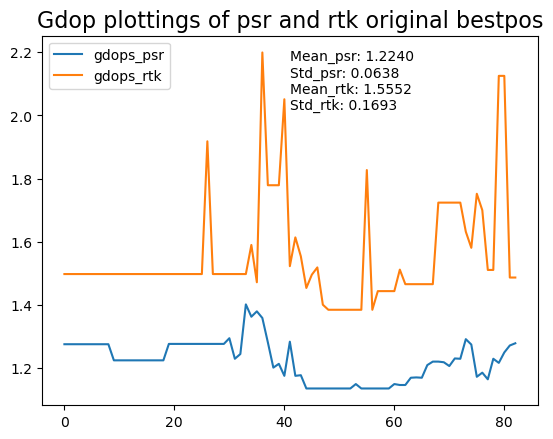

In [25]:
import matplotlib.pyplot as plt
import numpy as np
file_path1_psr= "/Users/ravitejakunchanapalli/Downloads/org_PSRDOP2.ASCII"
file_path2_rtk="/Users/ravitejakunchanapalli/Downloads/org_RTKDOP2.ASCII"
with open(file_path1_psr, 'r') as file1:
    data1= file1.readlines()
with open(file_path2_rtk, 'r') as file2:
    data2= file2.readlines()

# Initialize lists to store parsed data
gdops_psr = []
gdops_rtk = []
# Iterate through each line in the file
for line in data1:
    # Split the line into log header and fields
    log_header, fields = line.split(';')
    
    # Split the fields into individual data points
    fields = fields.split(',')
    
    # Extracting relevant data (latitude, longitude, and height)
    gdop = float(fields[0])
    #hdop= float(fields[2])
    
    # Store the parsed data in lists
    gdops_psr.append(gdop)
for line in data2:
    # Split the line into log header and fields
    log_header, fields = line.split(';')
    
    # Split the fields into individual data points
    fields = fields.split(',')
    
    # Extracting relevant data (latitude, longitude, and height)
    gdop = float(fields[0])
    #hdop= float(fields[2])
    
    # Store the parsed data in lists
    gdops_rtk.append(gdop)
mean_psr=np.mean(gdops_psr)
mean_rtk=np.mean(gdops_rtk)
std_psr=np.std(gdops_psr)
std_rtk=np.std(gdops_rtk)
plt.plot(gdops_psr,label='gdops_psr')
plt.plot(gdops_rtk,label='gdops_rtk')
# Display legend with mean and standard deviation values
#plt.legend(title='mean\nMean_psr: {:.2f}\nmean_rtk: {:.2f}'.format(mean_psr, mean_rtk))
plt.title('Gdop plottings of psr and rtk original bestpos', fontsize=16)
plt.legend(title='Mean and Std')
plt.text(0.5, 0.8, 'Mean_psr: {:.4f}\nStd_psr: {:.4f}\nMean_rtk: {:.4f}\nStd_rtk: {:.4f}'.format(mean_psr, std_psr, mean_rtk, std_rtk), transform=plt.gca().transAxes)
plt.legend()
plt.show()

## hdops plotting of psr and rtk old(original) files

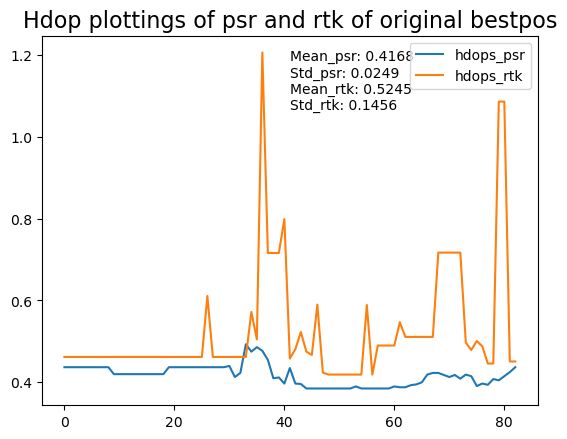

In [26]:
import matplotlib.pyplot as plt
import numpy as np
file_path1_psr= "/Users/ravitejakunchanapalli/Downloads/org_PSRDOP2.ASCII"
file_path2_rtk="/Users/ravitejakunchanapalli/Downloads/org_RTKDOP2.ASCII"
with open(file_path1_psr, 'r') as file1:
    data1= file1.readlines()
with open(file_path2_rtk, 'r') as file2:
    data2= file2.readlines()

# Initialize lists to store parsed data
hdops_psr = []
hdops_rtk = []
# Iterate through each line in the file
for line in data1:
    # Split the line into log header and fields
    log_header, fields = line.split(';')
    
    # Split the fields into individual data points
    fields = fields.split(',')
    
    # Extracting relevant data (latitude, longitude, and height)
    #gdop = float(fields[0])
    hdop= float(fields[2])
    
    # Store the parsed data in lists
    hdops_psr.append(hdop)
for line in data2:
    # Split the line into log header and fields
    log_header, fields = line.split(';')
    
    # Split the fields into individual data points
    fields = fields.split(',')
    
    # Extracting relevant data (latitude, longitude, and height)
    #gdop = float(fields[0])
    hdop= float(fields[2])
    
    # Store the parsed data in lists
    hdops_rtk.append(hdop)
mean_psr=np.mean(hdops_psr)
mean_rtk=np.mean(hdops_rtk)
std_psr=np.std(hdops_psr)
std_rtk=np.std(hdops_rtk)
plt.plot(hdops_psr,label='hdops_psr')
plt.plot(hdops_rtk,label='hdops_rtk')
# Display legend with mean and standard deviation values
#plt.legend(title='mean\nMean_psr: {:.2f}\nmean_rtk: {:.2f}'.format(mean_psr, mean_rtk))
plt.title('Hdop plottings of psr and rtk of original bestpos', fontsize=16)
plt.legend(title='Mean and Std')
plt.text(0.5, 0.8, 'Mean_psr: {:.4f}\nStd_psr: {:.4f}\nMean_rtk: {:.4f}\nStd_rtk: {:.4f}'.format(mean_psr, std_psr, mean_rtk, std_rtk), transform=plt.gca().transAxes)
plt.legend()
plt.show()

## Satellite visibility in psr pos and rtk pos(original files)

mean_Sol_Svs(PSRPOS) 47.3855421686747
min(psrpos) 41
max(psrpos) 51
mean_Sol_Svs(RTKPOS) 51.28915662650602
min(rtkpos) 42
max(rtkpos) 56


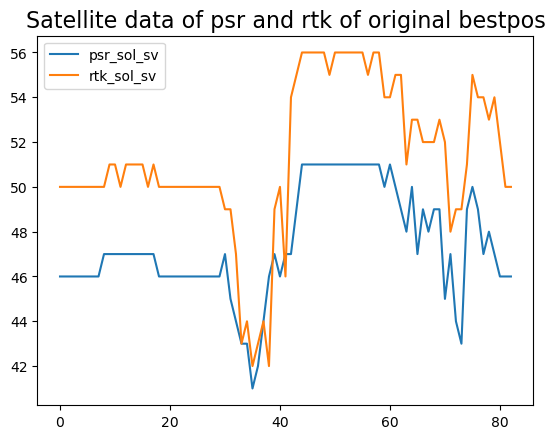

In [13]:
import matplotlib.pyplot as plt

# Read data from the first ascii file
file_path1= "/Users/ravitejakunchanapalli/Downloads/org_PSRPOS.ASCII"
with open(file_path1, 'r') as file1:
    data1= file1.readlines()
#Read data from the second ascii file
file_path2= "/Users/ravitejakunchanapalli/Downloads/org_RTKPOS.ASCII"
with open(file_path2, 'r') as file2:
    data2= file2.readlines()
# Initialize lists to store parsed data
num_sol_svs_psrpos = []
num_sol_svs_rtkpos = []

# Iterate through each line in the file
for line in data1:
    # Split the line into log header and fields
    log_header, fields = line.split(';')

    # Split the fields into individual data points
    fields = fields.split(',')

    # Extracting relevant data (latitude, longitude, and height)
    num_sol_sv = int(fields[14])

    # Store the parsed data in lists
    num_sol_svs_psrpos.append(num_sol_sv)



# Iterate through each line in the file
for line in data2:
    # Split the line into log header and fields
    log_header, fields = line.split(';')

    # Split the fields into individual data points
    fields = fields.split(',')

    # Extracting relevant data (latitude, longitude, and height)
    num_sol_sv = int(fields[14])

    # Store the parsed data in lists
    num_sol_svs_rtkpos.append(num_sol_sv)
print("mean_Sol_Svs(PSRPOS)",np.mean(num_sol_svs_psrpos))
print("min(psrpos)",min(num_sol_svs_psrpos))
print("max(psrpos)",max(num_sol_svs_psrpos))
print("mean_Sol_Svs(RTKPOS)",np.mean(num_sol_svs_rtkpos))
print("min(rtkpos)",min(num_sol_svs_rtkpos))
print("max(rtkpos)",max(num_sol_svs_rtkpos))
plt.plot(num_sol_svs_psrpos,label='psr_sol_sv')
plt.plot(num_sol_svs_rtkpos,label='rtk_sol_sv')

# Display legend with mean and standard deviation values
#plt.legend(title='mean\nMean_psr: {:.2f}\nmean_rtk: {:.2f}'.format(mean_psr, mean_rtk))
plt.title('Satellite data of psr and rtk of original bestpos', fontsize=16)
plt.legend()
plt.show()

## org_psrpos file

Latitude std dev 0.0004749714139093559
Longitude std dev 0.0001995191986159932
2d std_mean(org_psrpos) 0.3629511230736842
min(avg_std) 0.3368817299884338
max 0.41624080770630845


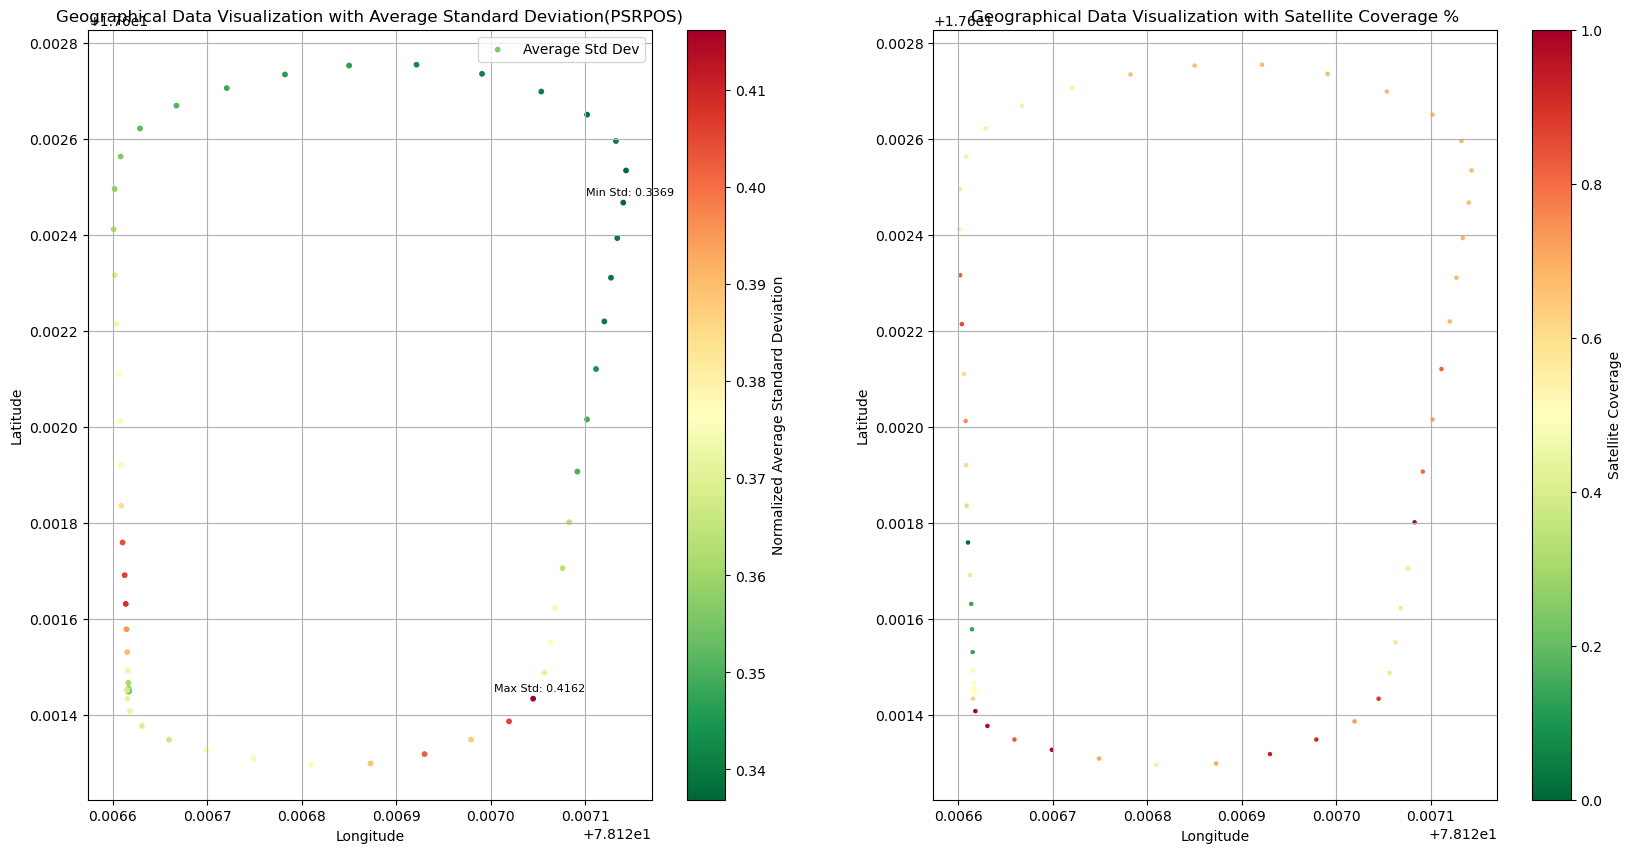

In [9]:
import matplotlib.pyplot as plt
import numpy as np
# Read data from the text file
file_path = "/Users/ravitejakunchanapalli/Downloads/org_PSRPOS.ASCII"
with open(file_path, 'r') as file:
    data = file.readlines()

# Initialize lists to store parsed data
latitudes = []
longitudes = []
std_latitudes = []
std_longitudes = []
num_sol_svs = []
num_svs = []
percentage_changes = []

# Iterate through each line in the file
for line in data:
    # Split the line into log header and fields
    log_header, fields = line.split(';')

    # Split the fields into individual data points
    fields = fields.split(',')

    # Extracting relevant data (latitude, longitude, and height)
    lat = float(fields[2])
    lon = float(fields[3])
    heigh = float(fields[3])
    std_latitude = float(fields[7])
    std_longitude = float(fields[8])
    std_heigh = float(fields[9])
    num_sv = int(fields[13])
    num_sol_sv = int(fields[14])

    # Store the parsed data in lists
    latitudes.append(lat)
    longitudes.append(lon)
    std_latitudes.append(std_latitude)
    std_longitudes.append(std_longitude)
    num_svs.append(num_sv)
    num_sol_svs.append(num_sol_sv)

    # Calculate percentage change and append to list
    val = (num_sv - num_sol_sv) / num_sol_sv * 100
    percentage_changes.append(val)

print("Latitude std dev",np.std(latitudes))
print("Longitude std dev",np.std(longitudes))
# Calculate the average of latitude and longitude standard deviations
avg_std = [math.sqrt((std_lat**2)+ (std_lon**2)) for std_lat, std_lon in zip(std_latitudes, std_longitudes)]
print("2d std_mean(org_psrpos)",np.mean(avg_std))
print("min(avg_std)",min(avg_std))
print("max",max(avg_std))

# Create scatter plot
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(longitudes, latitudes, c=avg_std, s=10, cmap='RdYlGn_r', label='Average Std Dev')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Data Visualization with Average Standard Deviation(PSRPOS)')
plt.colorbar(label='Normalized Average Standard Deviation')

# Find and annotate max and min standard deviations
max_std_index = avg_std.index(max(avg_std))
min_std_index = avg_std.index(min(avg_std))
plt.annotate(f'Max Std: {avg_std[max_std_index]:.4f}', (longitudes[max_std_index], latitudes[max_std_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
plt.annotate(f'Min Std: {avg_std[min_std_index]:.4f}', (longitudes[min_std_index], latitudes[min_std_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

plt.legend()
plt.grid()

# Normalize the percentage changes for coloring
min_pc = min(percentage_changes)
max_pc = max(percentage_changes)
norm_pc = [(pc - min_pc) / (max_pc - min_pc) for pc in percentage_changes]

plt.subplot(122)
plt.scatter(longitudes, latitudes, c=norm_pc, s=5, cmap='RdYlGn_r', label='% Change')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Data Visualization with Satellite Coverage %')
plt.colorbar(label='Satellite Coverage')
plt.grid()
plt.show()


## org_rtkpos

Latitude std dev 0.0004747012607458324
Longitude std dev 0.00020002942454655715
2d std_mean(org_rtkpos) 0.008996304565883947
min(avg_std) 0.006794115100585212
max 0.01690118339052032


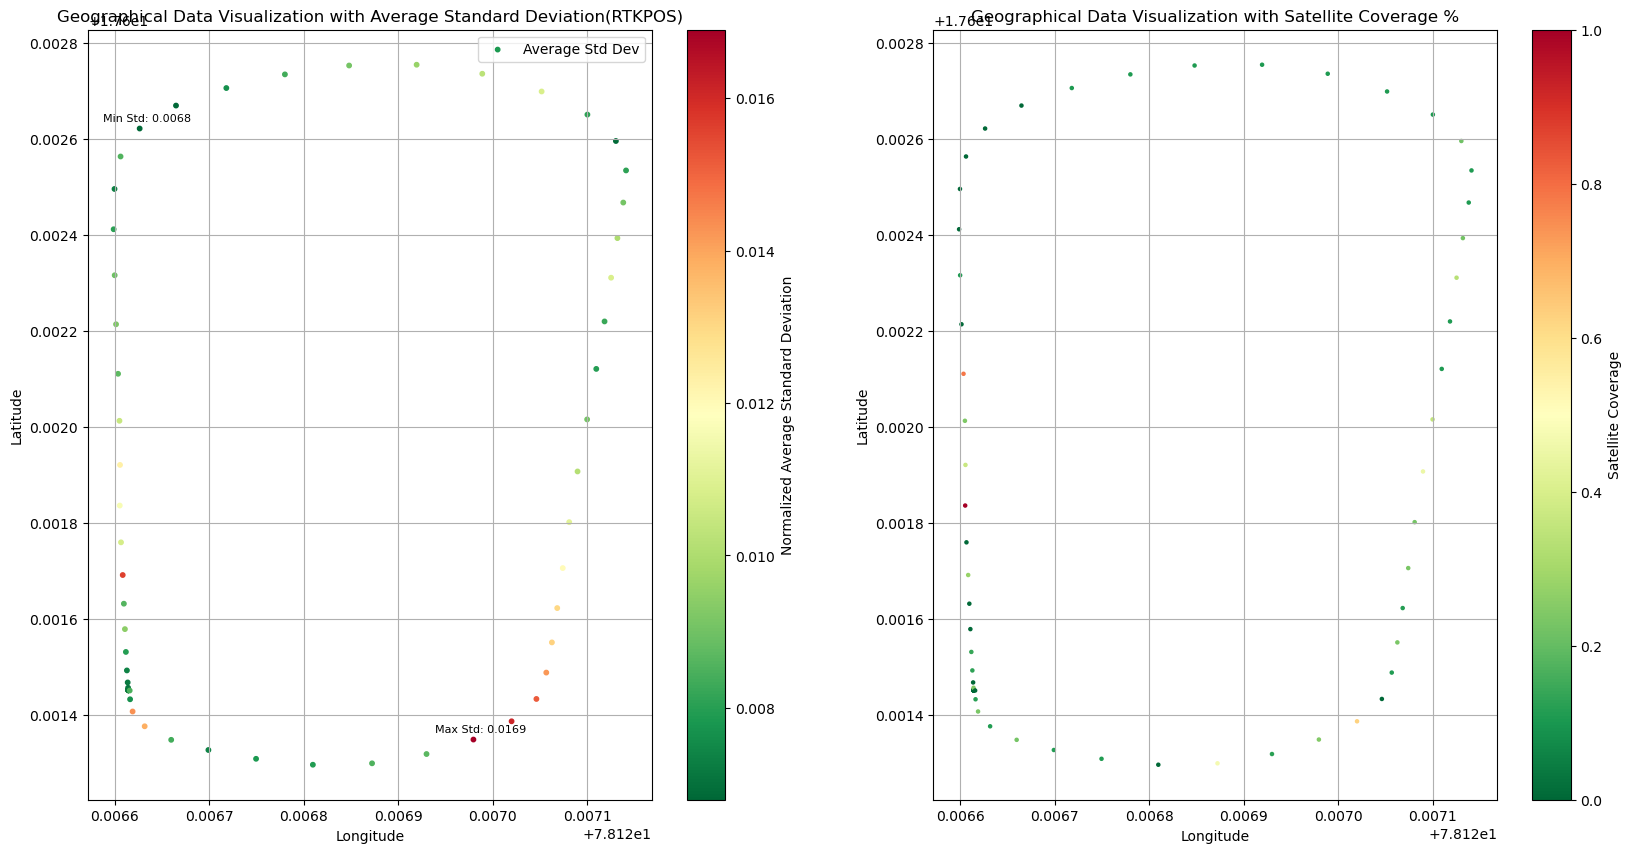

In [16]:
import matplotlib.pyplot as plt

# Read data from the text file
file_path = "/Users/ravitejakunchanapalli/Downloads/org_RTKPOS.ASCII"
with open(file_path, 'r') as file:
    data = file.readlines()

# Initialize lists to store parsed data
latitudes = []
longitudes = []
std_latitudes = []
std_longitudes = []
num_sol_svs = []
num_svs = []
percentage_changes = []

# Iterate through each line in the file
for line in data:
    # Split the line into log header and fields
    log_header, fields = line.split(';')

    # Split the fields into individual data points
    fields = fields.split(',')

    # Extracting relevant data (latitude, longitude, and height)
    lat = float(fields[2])
    lon = float(fields[3])
    heigh = float(fields[3])
    std_latitude = float(fields[7])
    std_longitude = float(fields[8])
    std_heigh = float(fields[9])
    num_sv = int(fields[13])
    num_sol_sv = int(fields[14])

    # Store the parsed data in lists
    latitudes.append(lat)
    longitudes.append(lon)
    std_latitudes.append(std_latitude)
    std_longitudes.append(std_longitude)
    num_svs.append(num_sv)
    num_sol_svs.append(num_sol_sv)

    # Calculate percentage change and append to list
    val = (num_sv - num_sol_sv) / num_sol_sv * 100
    percentage_changes.append(val)

print("Latitude std dev",np.std(latitudes))
print("Longitude std dev",np.std(longitudes))
# Calculate the average of latitude and longitude standard deviations
avg_std = [math.sqrt((std_lat**2)+ (std_lon**2)) for std_lat, std_lon in zip(std_latitudes, std_longitudes)]

print("2d std_mean(org_rtkpos)",np.mean(avg_std))
print("min(avg_std)",min(avg_std))
print("max",max(avg_std))



# Create scatter plot
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(longitudes, latitudes, c=avg_std, s=10, cmap='RdYlGn_r', label='Average Std Dev')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Data Visualization with Average Standard Deviation(RTKPOS)')
plt.colorbar(label='Normalized Average Standard Deviation')

# Find and annotate max and min standard deviations
max_std_index = avg_std.index(max(avg_std))
min_std_index = avg_std.index(min(avg_std))
plt.annotate(f'Max Std: {avg_std[max_std_index]:.4f}', (longitudes[max_std_index], latitudes[max_std_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
plt.annotate(f'Min Std: {avg_std[min_std_index]:.4f}', (longitudes[min_std_index], latitudes[min_std_index]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

plt.legend()
plt.grid()

# Normalize the percentage changes for coloring
min_pc = min(percentage_changes)
max_pc = max(percentage_changes)
norm_pc = [(pc - min_pc) / (max_pc - min_pc) for pc in percentage_changes]

plt.subplot(122)
plt.scatter(longitudes, latitudes, c=norm_pc, s=5, cmap='RdYlGn_r', label='% Change')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Data Visualization with Satellite Coverage %')
plt.colorbar(label='Satellite Coverage')
plt.grid()
plt.show()


## Lat long data plotting of rtkpos and psrpos 

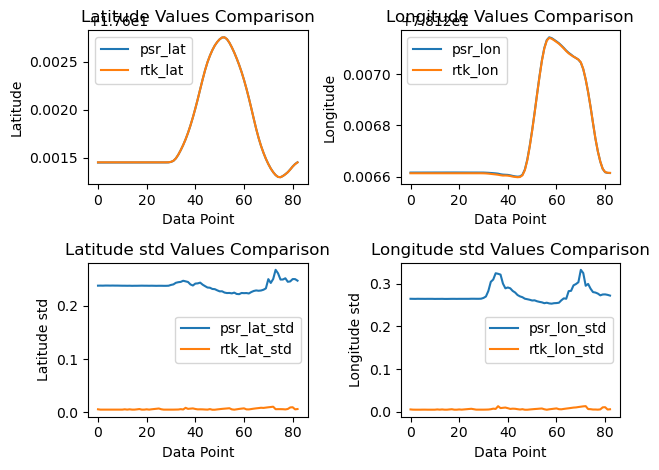

In [18]:
import matplotlib.pyplot as plt
import numpy as np
# Read data from the psrpos ascii
file_path1= "/Users/ravitejakunchanapalli/Downloads/org_RTKPOS.ASCII"
with open(file_path1, 'r') as file1:
    data1= file1.readlines()

# Read data from the rtkpos ascii
file_path2= "/Users/ravitejakunchanapalli/Downloads/org_PSRPOS.ASCII"
with open(file_path2, 'r') as file2:
    data2= file2.readlines()

# Initialize lists to store parsed data
rtk_latitudes = []
rtk_longitudes = []
rtk_std_latitudes=[]
rtk_std_longitudes=[]
psr_latitudes = []
psr_longitudes = []
psr_std_latitudes=[]
psr_std_longitudes=[]

# Iterate through each line in the file
for line in data1:
    # Split the line into log header and fields
    log_header, fields = line.split(';')

    # Split the fields into individual data points
    fields = fields.split(',')

    # Extracting relevant data (latitude, longitude)
    lat = float(fields[2])
    lon = float(fields[3])

    std_latitude = float(fields[7])
    std_longitude = float(fields[8])
    # Store the parsed data in lists

    rtk_latitudes.append(lat)
    rtk_longitudes.append(lon)
    rtk_std_latitudes.append(std_latitude)
    rtk_std_longitudes.append(std_longitude)


# Iterate through each line in the file
for line in data2:
    # Split the line into log header and fields
    log_header, fields = line.split(';')

    # Split the fields into individual data points
    fields = fields.split(',')

    # Extracting relevant data (latitude, longitude)
    lat = float(fields[2])
    lon = float(fields[3])

    std_latitude = float(fields[7])
    std_longitude = float(fields[8])
    # Store the parsed data in lists

    psr_latitudes.append(lat)
    psr_longitudes.append(lon)
    psr_std_latitudes.append(std_latitude)
    psr_std_longitudes.append(std_longitude)
   


# Plotting Latitude 
plt.subplot(2, 2, 1)  # (rows, columns, plot_number)
plt.plot(psr_latitudes,label='psr_lat')
plt.plot(rtk_latitudes,label='rtk_lat')

plt.xlabel('Data Point')
plt.ylabel('Latitude')
plt.title('Latitude Values Comparison')
plt.legend()


# Plotting Longitude
plt.subplot(2, 2, 2)  # (rows, columns, plot_number)
plt.plot(psr_longitudes,label='psr_lon')
plt.plot(rtk_longitudes,label='rtk_lon')

plt.xlabel('Data Point')
plt.ylabel('Longitude')
plt.title('Longitude Values Comparison')
plt.legend()


plt.subplot(2, 2, 3)  # (rows, columns, plot_number)
plt.plot(psr_std_latitudes, label='psr_lat_std')
plt.plot(rtk_std_latitudes, label='rtk_lat_std')

plt.xlabel('Data Point')
plt.ylabel('Latitude std')
plt.title('Latitude std Values Comparison')
plt.legend()


plt.subplot(2, 2, 4)  # (rows, columns, plot_number)
plt.plot(psr_std_longitudes, label='psr_lon_std')
plt.plot(rtk_std_longitudes, label='rtk_lon_std')

plt.xlabel('Data Point')
plt.ylabel('Longitude std')
plt.title('Longitude std Values Comparison')
plt.legend()


plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()





